In [1]:
# Multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [168]:
import pandas as pd
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import matplotlib.font_manager as font_manager
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [3]:
# Fonte: Radar IDHM (PNADS 2011-2015) ---- http://www.atlasbrasil.org.br/2013/pt/download/
# Dicionário no arquivo 'Indicadores Atlas - DICIONARIO'
idh = pd.read_csv('Indicadores Atlas.csv', encoding='ISO-8859-1', delimiter=';')

idh.head()

,ANO,NOME_AGREGA,AGREGA,ESPVIDA,MORT1,T_ENV,RAZDEP,ANOSEST,T_ANALF15M,T_ANALF18M,T_ANALF25M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_FLBAS,T_FLFUND,T_FLMED,T_FLSUPER,T_FREQ5A6,T_FREQ6A14,T_FREQ15A17,T_FREQ18A24,T_FUND11A13,T_FUND15A17,T_FUND18M,T_FUND18A24,T_FUND25M,T_MED18A20,T_MED25M,T_SUPER25M,R1040,R2040,RDPC,RDPC1,RDPC2,RDPC3,RDPC4,RDPC5,RDPC10,RDPCT,RIND,RMPOB,RPOB,PRENTRAB,PIND,PMPOB,PPOB,GINI,THEIL,POP,POP5A6,POP6A14,POP6A17,POP11A13,POP15A17,POP15M,POP18M,POP18A20,POP18A24,POP25M,POP65M,POPT,POPTOT,I_ESCOLARIDADE,I_FREQ_PROP,IDHM_E,IDHM_L,IDHM_R,IDHM
0,2011,RO,11,"70,32","22,24","5,29","45,77","7,60","9,74","10,66","12,68","23,15","19,07","90,09","94,56","45,80","10,70","70,03","95,77","80,47","25,25","87,05","56,52","55,73","77,74","51,02","41,12","32,87","8,96","12,64","8,99","613,70","116,22","256,57","400,02","620,27","1675,90","2356,51","619,50","31,81","86,47","153,80","84,93","3,96","12,75","30,47","0,496","0,437",1587902,58704,287138,405050,103310,117912,1249245,1131333,83742,199175,932158,89420,1573035,1587902,"0,557","0,637","0,609","0,755","0,697","0,687"
1,2012,RO,11,"70,53","21,75","4,99","44,60","7,94","8,57","9,26","11,35","22,21","16,47","93,47","97,41","46,94","11,55","81,58","98,66","82,08","23,32","88,19","55,43","55,80","79,82","50,22","43,76","33,40","8,62","11,86","8,49","633,34","126,82","268,76","430,03","665,67","1679,67","2344,94","639,64","34,00","90,31","153,67","83,39","3,07","11,28","27,37","0,482","0,405",1649946,56146,276266,380668,93798,104402,1269765,1165363,92834,219635,945728,85458,1633695,1649946,"0,558","0,672","0,632","0,759","0,703","0,698"
2,2013,RO,11,"70,74","21,27","5,60","43,78","7,80","8,56","9,24","11,09","20,43","16,87","93,52","96,72","49,40","14,25","82,84","98,19","83,45","28,50","87,84","57,31","54,40","79,59","48,95","41,84","32,02","8,87","11,17","8,10","621,39","127,31","272,46","435,14","656,21","1618,23","2233,28","631,23","23,30","78,09","153,88","83,77","3,76","10,07","27,27","0,474","0,391",1670217,49667,281864,383388,100021,101524,1302660,1201136,95435,213518,987618,97140,1644167,1670217,"0,544","0,675","0,628","0,762","0,699","0,696"
3,2014,RO,11,"70,94","20,82","5,76","45,20","8,31","8,34","8,88","10,66","15,55","13,10","93,39","97,13","50,14","16,90","90,54","98,84","79,48","29,72","87,96","60,40","58,46","81,82","53,44","46,35","38,43","10,61","10,90","7,86","667,41","146,53","294,82","452,72","691,37","1734,50","2405,33","674,18","31,64","77,96","158,97","83,47","3,01","7,19","22,73","0,469","0,380",1657696,55918,281102,369509,96227,88407,1308580,1220173,96724,216118,1004055,101017,1641072,1657696,"0,585","0,713","0,667","0,766","0,711","0,715"
4,2015,RO,11,"71,14","20,38","7,13","45,02","8,35","8,01","8,65","10,06","17,07","12,24","91,70","96,34","45,27","15,37","88,57","97,46","80,10","25,30","90,43","57,21","57,26","78,91","53,14","42,64","37,34","10,68","11,15","8,07","634,73","136,81","272,50","441,48","661,42","1651,35","2281,71","637,57","28,18","95,94","159,04","81,58","1,68","9,53","26,70","0,470","0,391",1755648,56758,265852,374465,87530,108613,1349021,1240408,88078,198580,1041828,126433,1747811,1755648,"0,573","0,697","0,653","0,769","0,703","0,708"


In [4]:
idh.isnull().mean()[idh.isnull().any()==True].sort_values(ascending=False)
idh.isnull().sum().sum()

Series([], dtype: float64)

0

In [5]:
# Transformação de floats

to_float = idh.select_dtypes(include='object').columns.drop('NOME_AGREGA')

for col in to_float:
    idh[col] = idh[col].str.replace(',', '.').astype('float')

idh.dtypes

ANO                    int64
NOME_AGREGA           object
AGREGA                 int64
ESPVIDA              float64
MORT1                float64
T_ENV                float64
RAZDEP               float64
ANOSEST              float64
T_ANALF15M           float64
T_ANALF18M           float64
T_ANALF25M           float64
T_ATRASO_2_BASICO    float64
T_ATRASO_2_FUND      float64
T_FLBAS              float64
T_FLFUND             float64
T_FLMED              float64
T_FLSUPER            float64
T_FREQ5A6            float64
T_FREQ6A14           float64
T_FREQ15A17          float64
T_FREQ18A24          float64
T_FUND11A13          float64
T_FUND15A17          float64
T_FUND18M            float64
T_FUND18A24          float64
T_FUND25M            float64
T_MED18A20           float64
T_MED25M             float64
T_SUPER25M           float64
R1040                float64
                      ...   
RDPCT                float64
RIND                 float64
RMPOB                float64
RPOB          

In [6]:
idh.iloc[:, :34].describe().T

,count,mean,std,min,25%,50%,75%,max
ANO,185.0,2013.000000,1.418051,2011.00,2012.00,2013.00,2014.00,2015.00
AGREGA,185.0,910.432432,1548.214830,11.00,23.00,33.00,1500.00,5300.00
ESPVIDA,185.0,74.219243,2.480149,69.07,72.20,74.33,76.62,79.07
MORT1,185.0,15.784108,4.418957,9.19,11.75,15.83,18.77,27.95
T_ENV,185.0,8.022216,1.857432,3.05,6.99,8.10,9.25,12.26
RAZDEP,185.0,45.756432,5.392463,37.23,41.95,43.89,49.33,61.78
ANOSEST,185.0,8.736757,1.148590,6.26,7.78,8.79,9.61,11.21
T_ANALF15M,185.0,8.814324,5.718981,2.13,3.67,7.18,13.76,21.97
T_ANALF18M,185.0,9.467189,6.204164,2.20,3.87,7.63,15.07,23.87
T_ANALF25M,185.0,11.132486,7.367161,2.46,4.40,9.07,18.10,28.52


In [7]:
idh.iloc[:, 34:].describe().T

,count,mean,std,min,25%,50%,75%,max
RDPC3,185.0,4.606021e+02,1.568519e+02,206.430,316.370,426.360,596.790,7.881700e+02
RDPC4,185.0,7.252357e+02,2.655247e+02,329.550,505.860,656.210,909.360,1.510800e+03
RDPC5,185.0,2.114354e+03,8.673055e+02,975.510,1473.710,1863.100,2511.160,5.034040e+03
RDPC10,185.0,3.044085e+03,1.229542e+03,1435.590,2185.170,2652.410,3674.700,7.077430e+03
RDPCT,185.0,7.561171e+02,2.845567e+02,341.970,530.090,666.260,937.220,1.608540e+03
RIND,185.0,2.921578e+01,1.086548e+01,4.830,20.250,28.970,38.320,5.096000e+01
RMPOB,185.0,7.980081e+01,9.168948e+00,50.940,75.820,81.170,86.140,1.000300e+02
RPOB,185.0,1.554159e+02,1.082050e+01,123.970,147.280,156.730,162.920,1.783600e+02
PRENTRAB,185.0,7.664351e+01,5.247899e+00,64.000,72.670,77.460,80.680,8.927000e+01
PIND,185.0,3.999459e+00,2.965594e+00,0.640,1.710,3.010,5.750,1.583000e+01


In [8]:
# Importação do mapa base
mapa = gpd.read_file('Brasil.json', driver='JSON', crs={'init': 'epsg:4326'})

# Colunas adicionais com a área total e a área urbana em km² de cada estado
# Fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_%C3%A1rea
# Segundo a fonte, os dados são de 2010, não foram encontrados dados mais atualizados na base do IBGE nem do Embrapa
mapa['AREA_KM2'] = np.array([164_123.040, 27_778.506, 142_828.521, 1_559_159.148, 564_733.177, 148_920.472,
                             5_779.999, 46_095.583, 340_111.783, 331_937.450, 903_366.192, 357_145.532,
                             586_522.122, 1_247_954.666, 56_585.000, 199_307.922, 98_311.616, 251_577.738,
                             43_780.172, 52_811.047, 281_730.223, 237_590.547, 224_300.506, 95_736.165,
                             248_222.362, 21_915.116, 277_720.520])
mapa['AREAURB_KM2'] = np.array([49.5, 202.1, 69.3, 395.1, 762.9, 471.2, 621.2, 427.6, 1_113.6, 512.3, 519.7,
                                441.3, 2_525.8, 730.6, 319.6, 1_603.7, 622.3, 277.1, 1_479.9, 269.6, 1_647,
                                226.1, 40.6, 878.2, 4_971, 118.7, 99.6])

In [9]:
mapa.head()

,UF,ESTADO,REGIAO,geometry,AREA_KM2,AREAURB_KM2
0,AC,Acre,NO,"POLYGON ((-68.61895 -11.129709, -68.685345 -11...",164123.040,49.5
1,AL,Alagoas,NE,"POLYGON ((-36.431494 -10.448229, -36.473394 -1...",27778.506,202.1
2,AP,Amapá,NO,"(POLYGON ((-51.909319 -1.165791, -51.965264 -1...",142828.521,69.3
3,AM,Amazonas,NO,"POLYGON ((-63.47887 2.198446, -63.439548 2.092...",1559159.148,395.1
4,BA,Bahia,NE,"(POLYGON ((-45.959232 -14.897264, -45.935374 -...",564733.177,762.9


In [10]:
# mapa.to_file('mapa_base.json', driver='GeoJSON')
# idh.to_csv('idh_2011a2015.csv', index=False)

In [11]:
idh = idh[idh['NOME_AGREGA'].isin(mapa['UF'])]

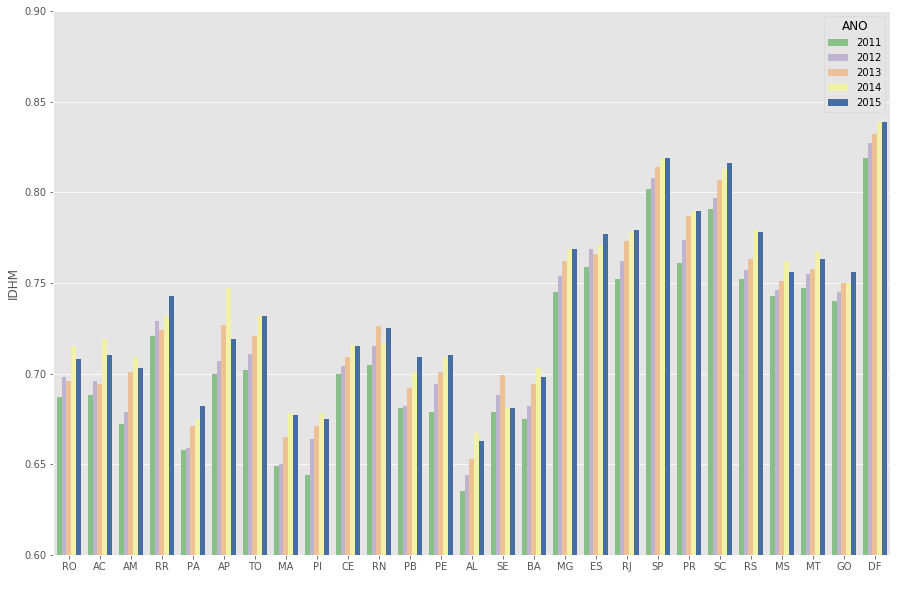

In [12]:
# Plot da evolução do IDHM em cada UF.

fig, ax = plt.subplots(figsize=(15, 10))
_ = sns.barplot(y='IDHM', x='NOME_AGREGA', hue='ANO', data=idh, ax=ax, palette='Accent')
_ = ax.set(ylim=(0.6, .9), xlabel=' ')

**Dados interessantes:**<br>
1. Nas UFs Rondônia e Acre o IDHM deu um grande salto de 2013 a 2014 e teve uma queda de 2014 para 2015.
2. Em 2012 o IDHM da UF Amazonas aumentou bastante e depois em 2014 veio a diminuir.
3. Em 2015 a UF Amapá obteve um IDHM menor que em 2013.
4. Na UF Sergipe o IDHM de 2014 e 2015 foram menores que o de 2012, mesmo com uma elevação em 2013.
5. No geral observa-se a tendência do crescimento do IDHM, contudo em 2015 o IDHM não elevou tanto quanto esperava, muito provável pela interferência da crise econômica registrada no ano.

In [13]:
# Criação de um dicionário com o dataset divido por UF.

uf_dfs = {}
for uf in idh['NOME_AGREGA'].unique():
    uf_dfs[uf] = idh[idh['NOME_AGREGA']==uf]

In [169]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

# Uso do Lasso para verificar quais são as features mais relevantes, neste primeiro momento a ideia é encontrar o melhor alpha
# para este dataset com todos os estados para uma ideia inicial.

X = idh.drop(['IDHM', 'IDHM_E', 'IDHM_R', 'IDHM_L', 'NOME_AGREGA', 'AGREGA',
              'POP', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
              'POP15M', 'POP18M', 'POP18A20', 'POP18A24', 'POP25M', 'POP65M',
              'POPT', 'POPTOT'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = idh['IDHM']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3)


alphas = np.arange(0, 0.01, 0.00005)
mse_scores = []
r2_scores = []

for a in alphas:
    lasso = Lasso(alpha=a).fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)
    
pd.DataFrame({'Alpha': alphas, 'MSE': mse_scores, 'R2': r2_scores})

,Alpha,MSE,R2
0,0.00000,8.129175e-07,0.999607
1,0.00005,8.849415e-07,0.999572
2,0.00010,1.635176e-06,0.999209
3,0.00015,2.506338e-06,0.998788
4,0.00020,2.779678e-06,0.998656
5,0.00025,2.991886e-06,0.998553
6,0.00030,3.093558e-06,0.998504
7,0.00035,3.205494e-06,0.998450
8,0.00040,3.278895e-06,0.998414
9,0.00045,3.353571e-06,0.998378


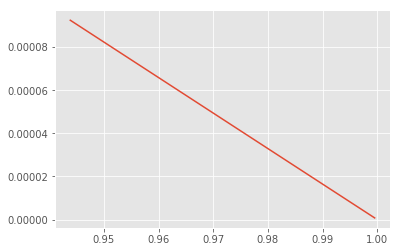

In [167]:
sns.lineplot(x=r2_scores, y=mse_scores);

In [24]:
# Não foi possível uma análise com o algoritmo Lasso, não performou conforme esperado, possíveis causas é a alta colinearidade
# das features, o que faz com que modelos lineares não tenha uma boa performance.

# A ideia agora é testar com uma regressão linear simples na tentativa de verificar a hipótese da colinearidade das features.

import statsmodels.api as sm

#X_sm = sm.add_constant(X_scaled) #adiciona a cte a base de dados
est = sm.OLS(y, X_scaled)
est_sm = est.fit()
print(est_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   IDHM   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.545
Method:                 Least Squares   F-statistic:                  0.007908
Date:                Thu, 20 Sep 2018   Prob (F-statistic):               1.00
Time:                        12:34:02   Log-Likelihood:                -148.72
No. Observations:                 135   AIC:                             393.4
Df Residuals:                      87   BIC:                             532.9
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -5.529e-05      0.193     -0.000      1.0

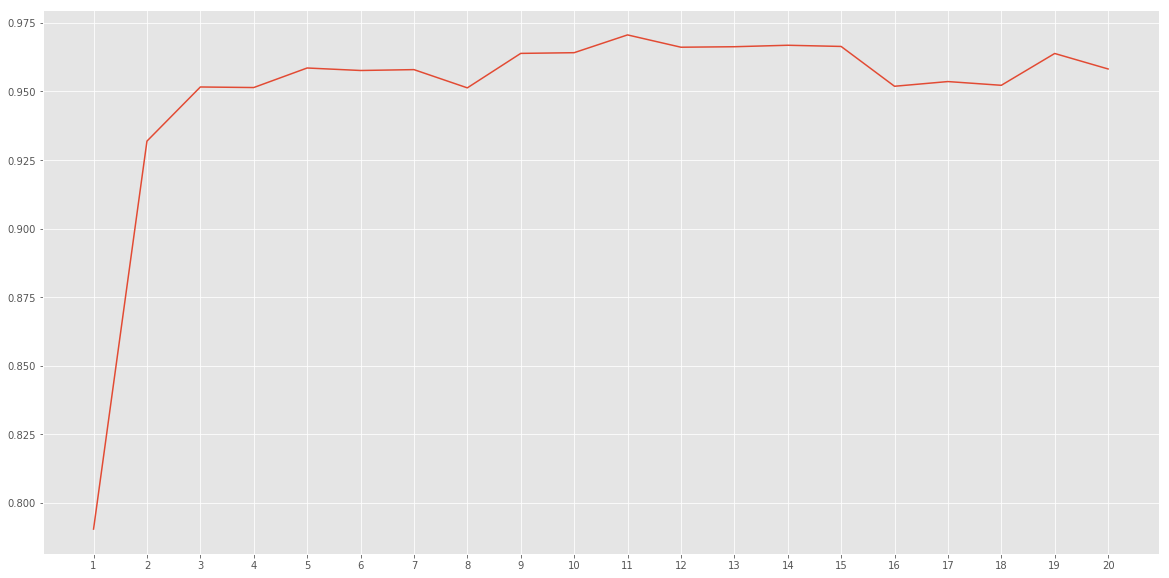

In [97]:
# A regressão linear simples mostrou-se muito volátil quando é utilizada ou não a constante, a hipótese é que realmente possui
# muitas variáveis colineares, sendo assim modelos lineares não terão a perfomance desejada.

# Uso do Random Forest para verificar sua perfomance quanto ao dataset.

from sklearn.ensemble import RandomForestRegressor

r2_scores = []
max_depths = range(1, 21)

for i in max_depths:
    rf = RandomForestRegressor(max_depth=i, n_jobs=-1).fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    r2_scores.append(r2)

fig, ax = plt.subplots(figsize=(20, 10))
_ = sns.lineplot(x=max_depths, y=r2_scores, ax=ax)
_ = ax.set_xticks(max_depths)

In [120]:
# A melhor performance de acordo com o gráfico gerado acima para evitar overfitting é com o max_depth=3, será utilizado
# um n_estimators alto para evitar a variabilidade excessiva das importâncias das features já que o modelo usado é com base
# na aleatoriedade.
rf = RandomForestRegressor(max_depth=3, n_estimators=1000, n_jobs=-1).fit(X, y)

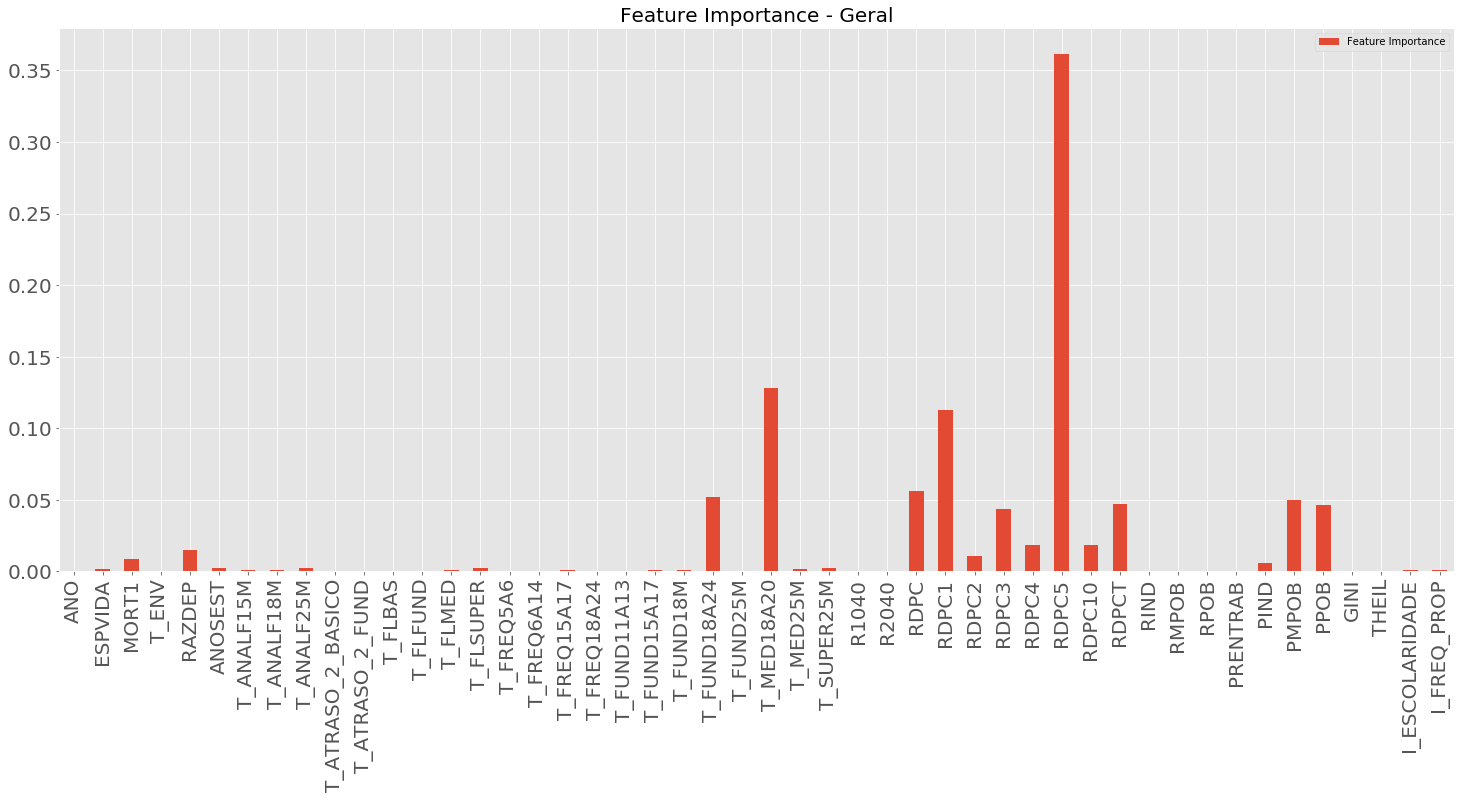

In [121]:
# O resultado obtido com Random Forest foi bom, este algoritmo será utilizado para a visualização da importância das features.
fi_rf = pd.DataFrame({'Feature Importance':rf.feature_importances_}, index=X.columns)

_ = fi_rf.plot(kind='bar', figsize=(25, 10))
_ = plt.title('Feature Importance - Geral', fontsize=20)
_ = plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)

In [129]:
# Feature importance com Random Forest em cada um dos datasets separados por UF.
fi_dfs = {}
for uf, df in tqdm_notebook(uf_dfs.items()):
    uf_X = df.drop(['IDHM', 'IDHM_E', 'IDHM_R', 'IDHM_L', 'NOME_AGREGA', 'AGREGA',
                    'POP', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
                    'POP15M', 'POP18M', 'POP18A20', 'POP18A24', 'POP25M', 'POP65M',
                    'POPT', 'POPTOT'], axis=1)
    
    uf_y = df['IDHM']
    
    rf = rf.fit(uf_X, uf_y)
    
    fi = pd.DataFrame({'Feature Importance': rf.feature_importances_}, index=uf_X.columns)
    fi_dfs[uf] = fi

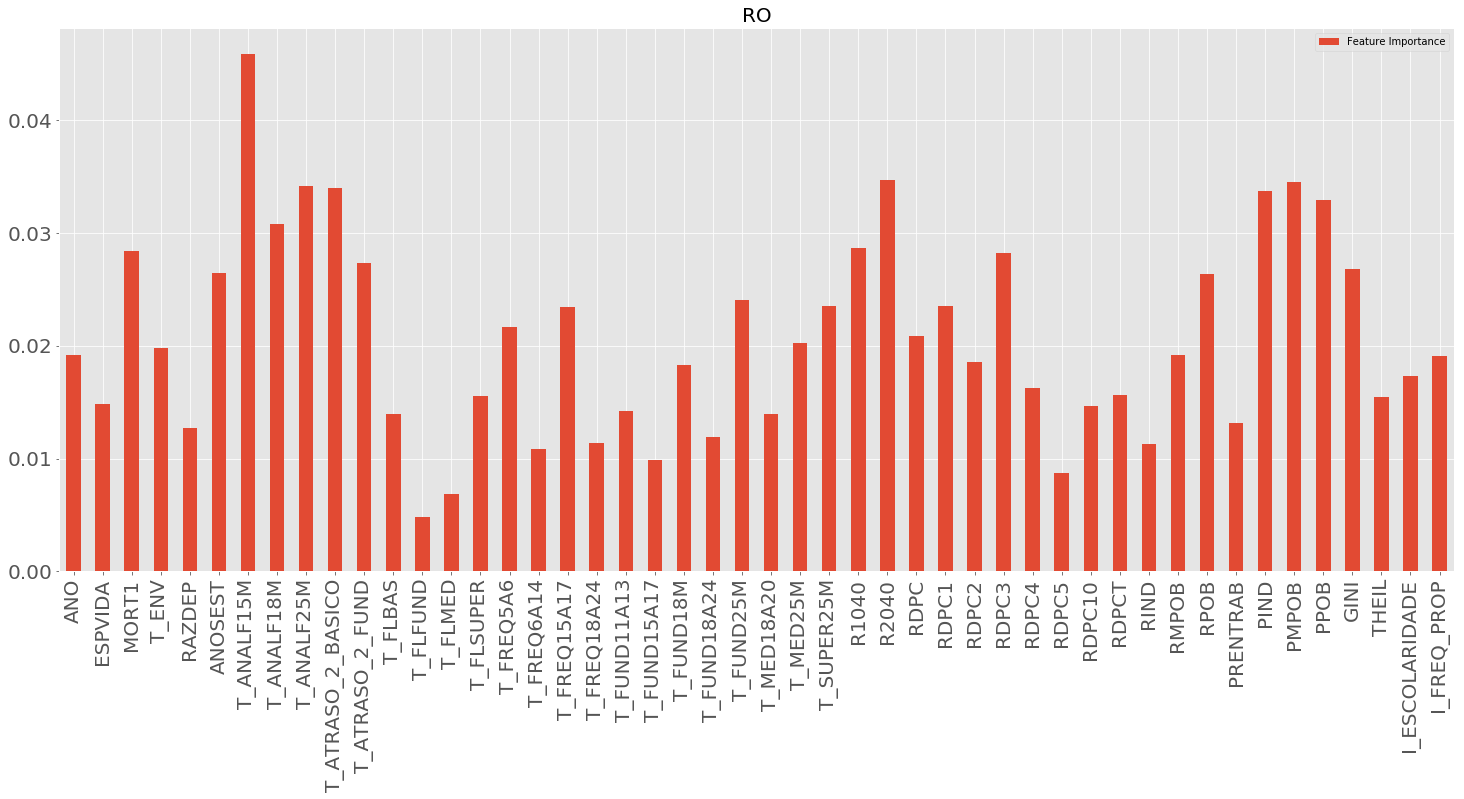

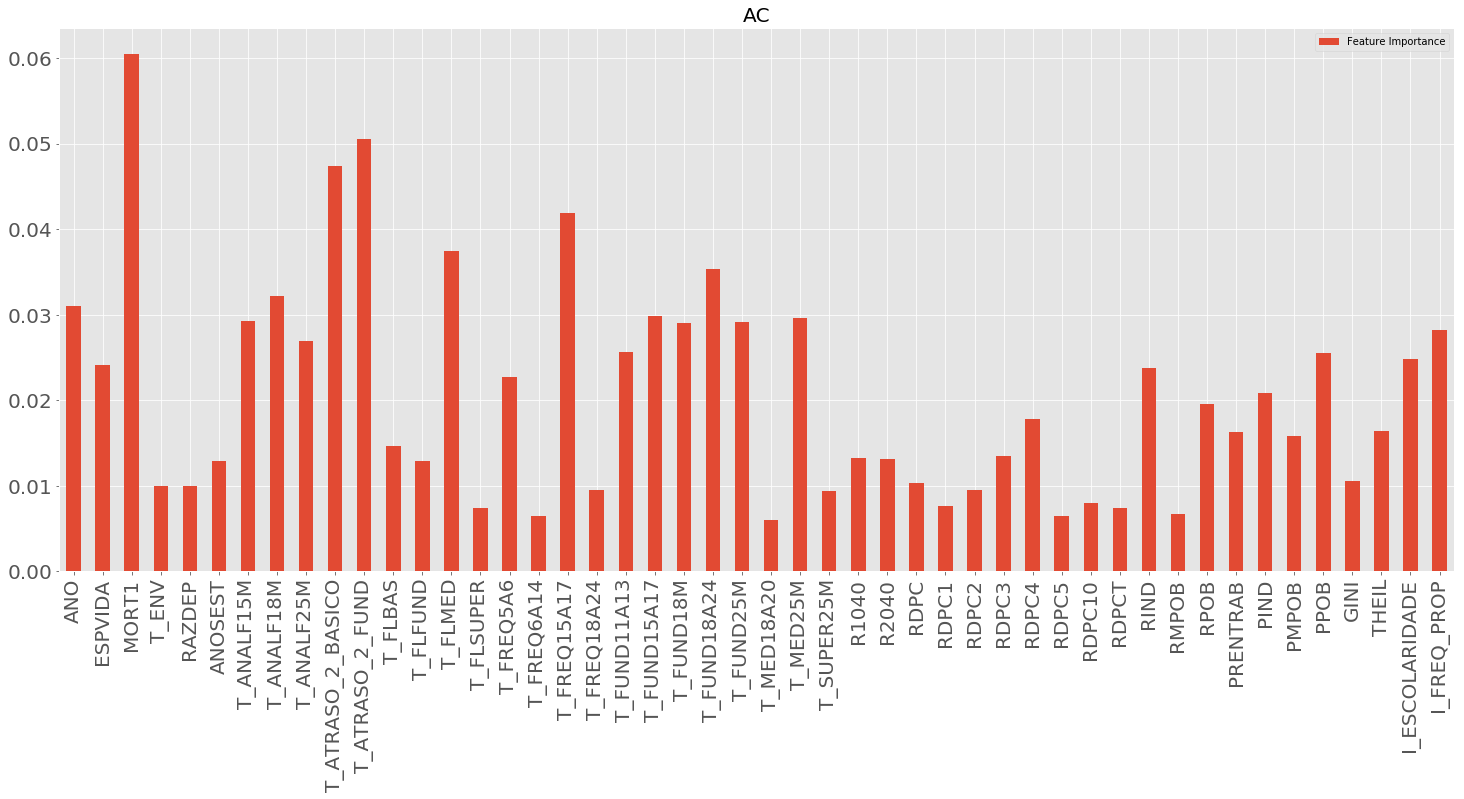

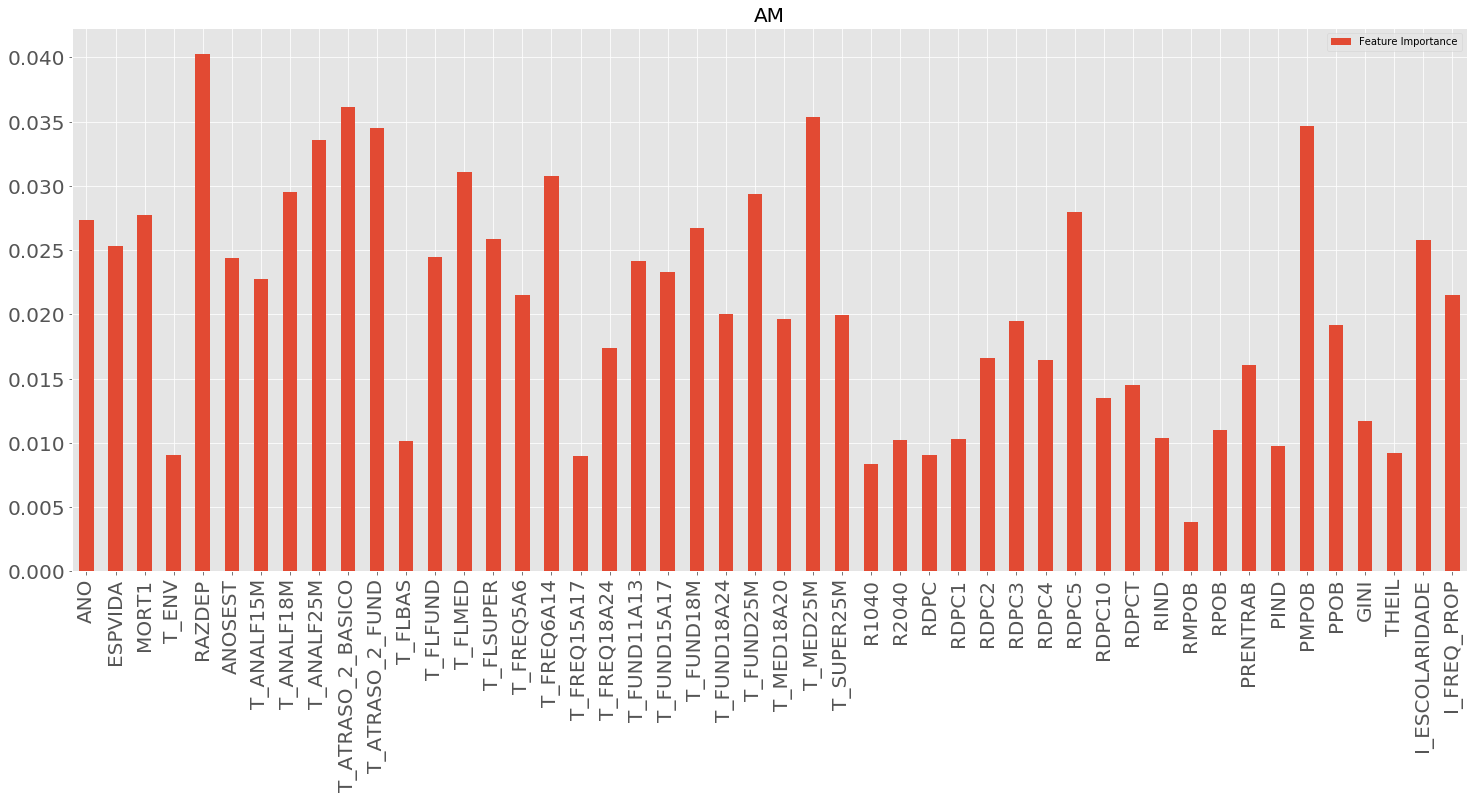

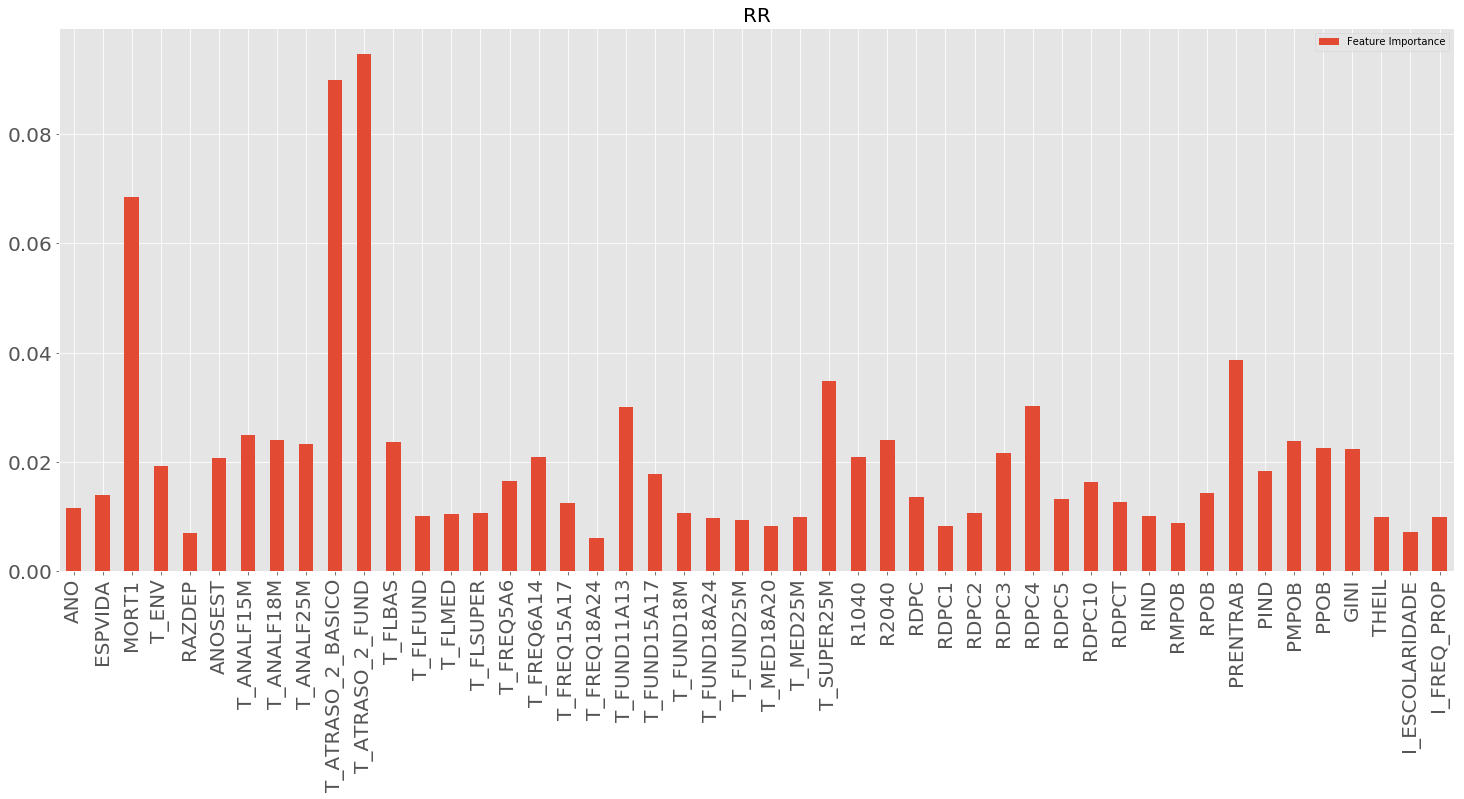

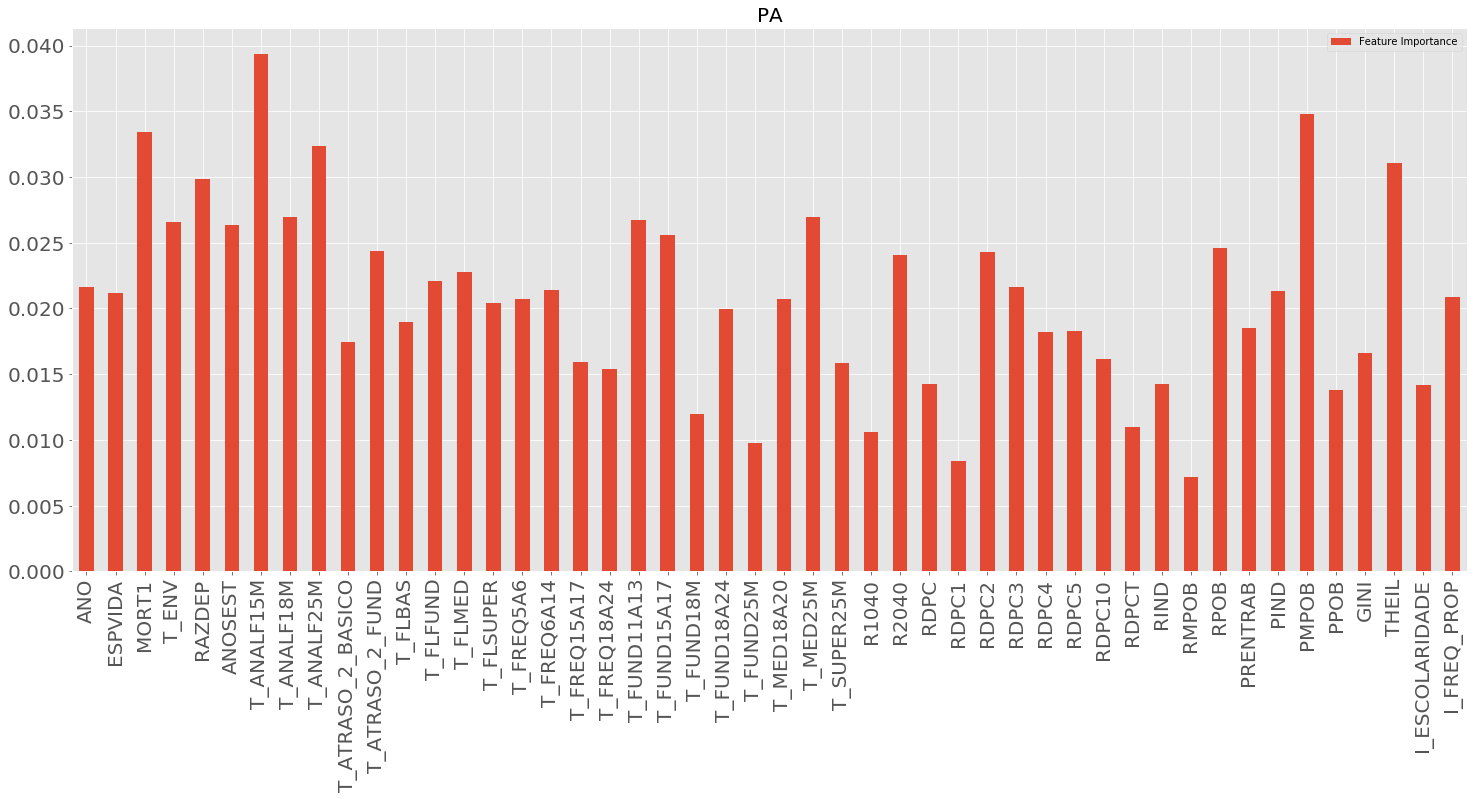

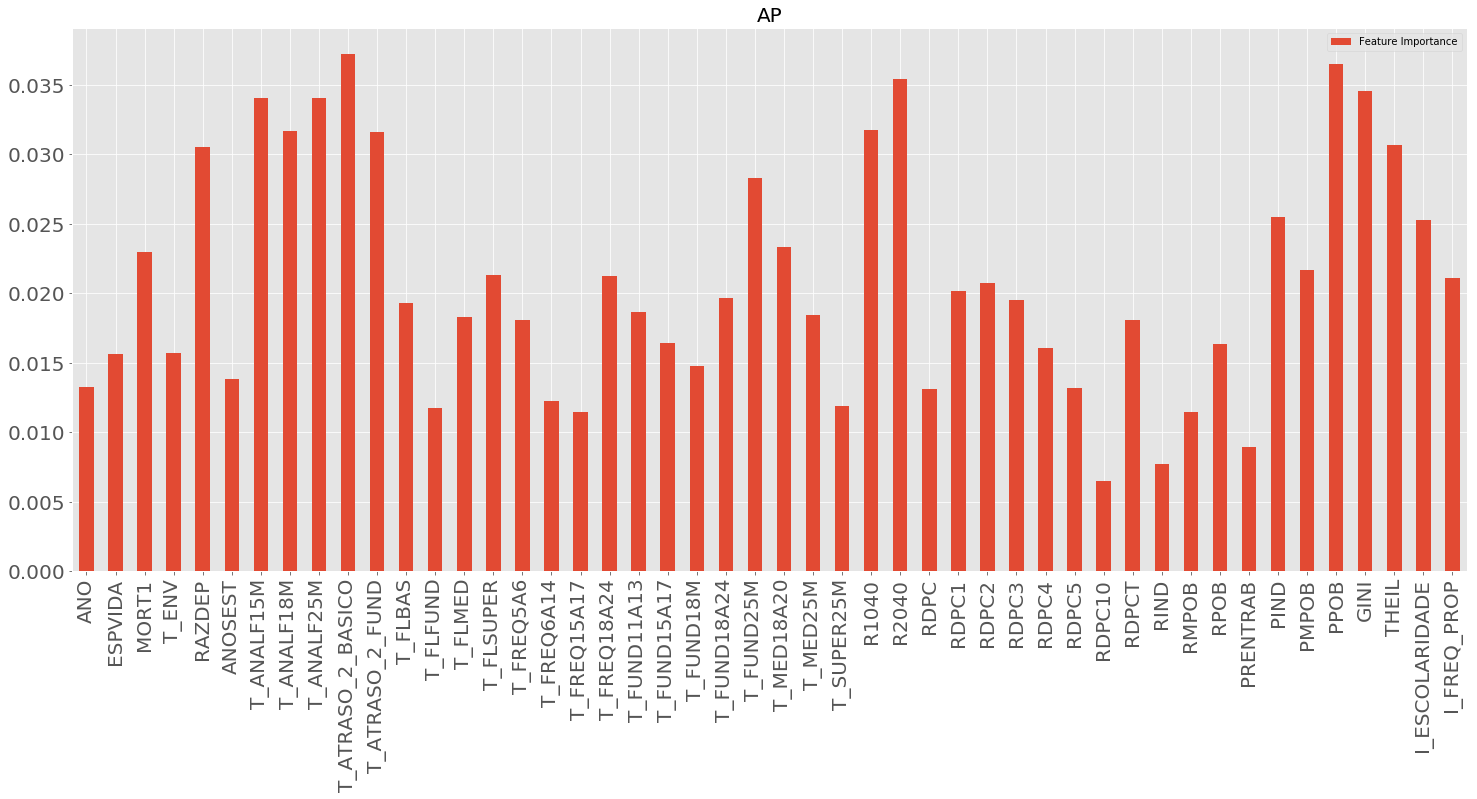

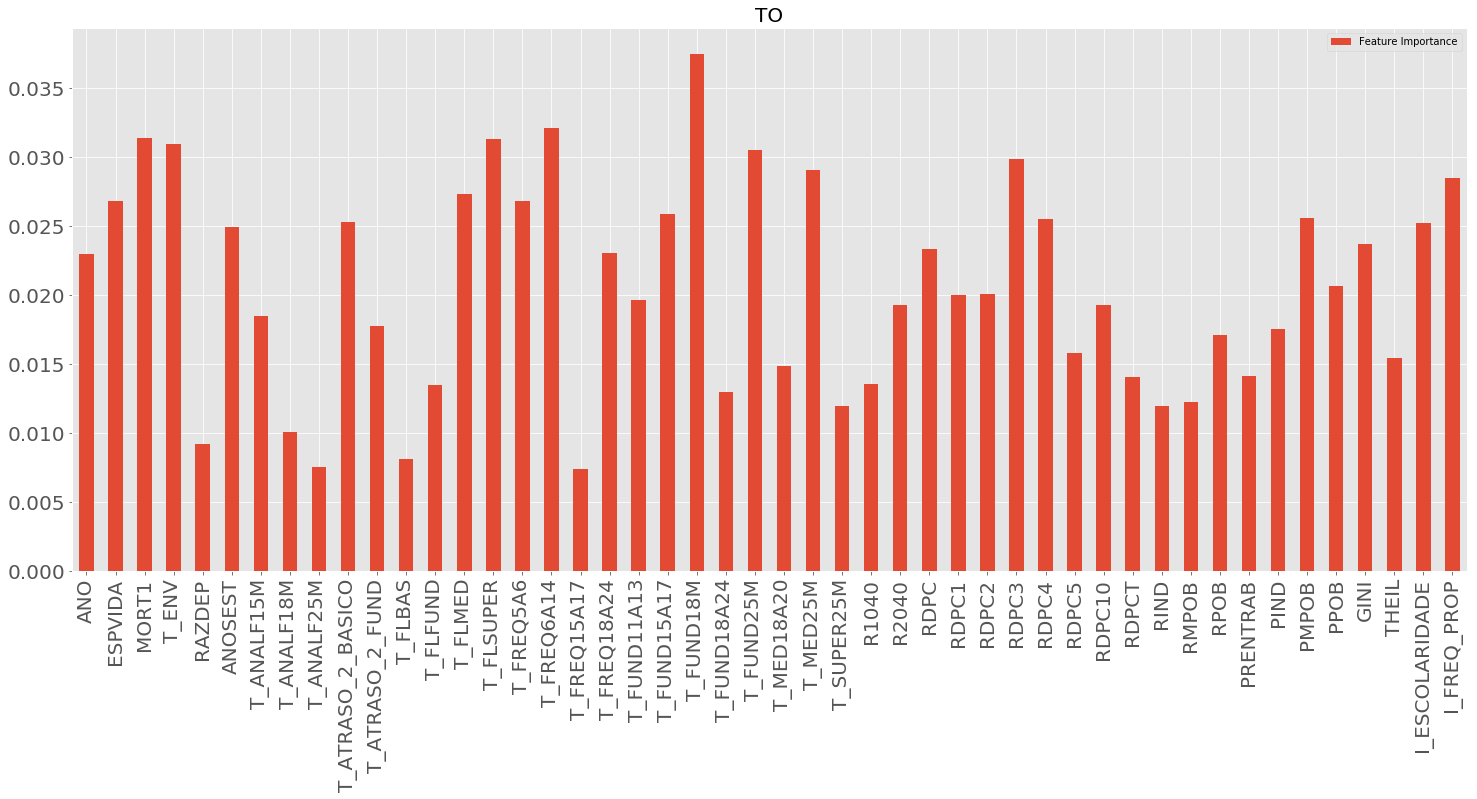

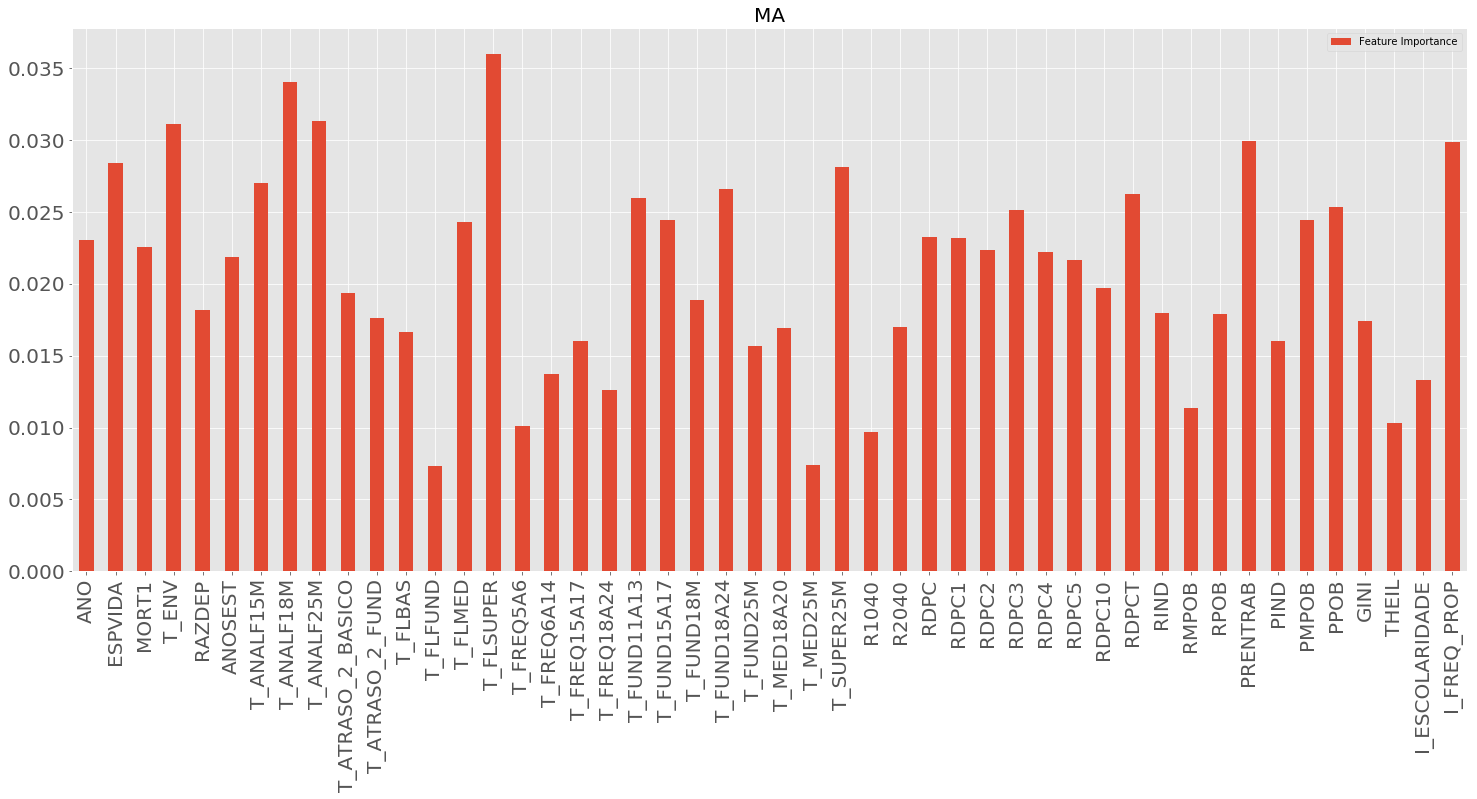

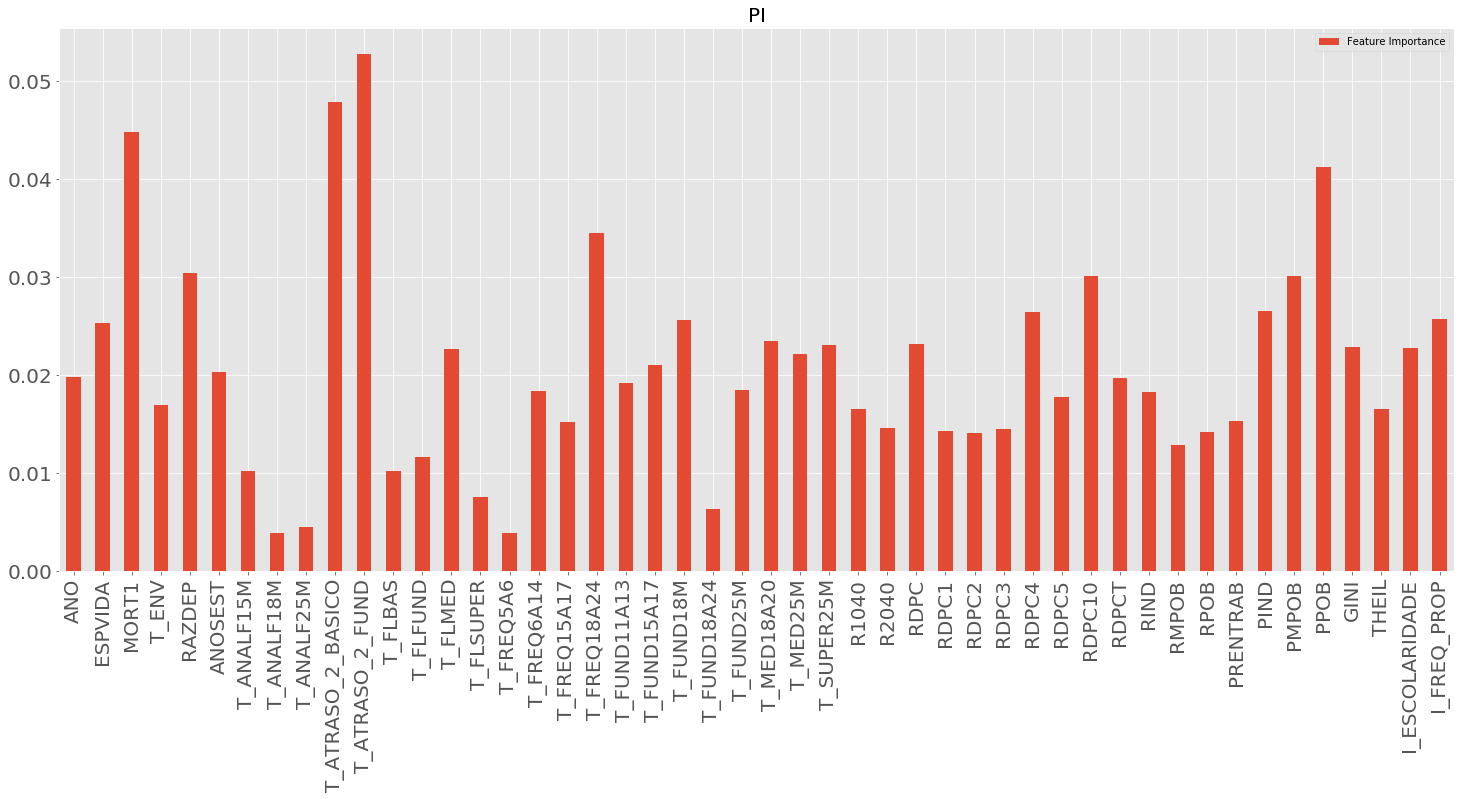

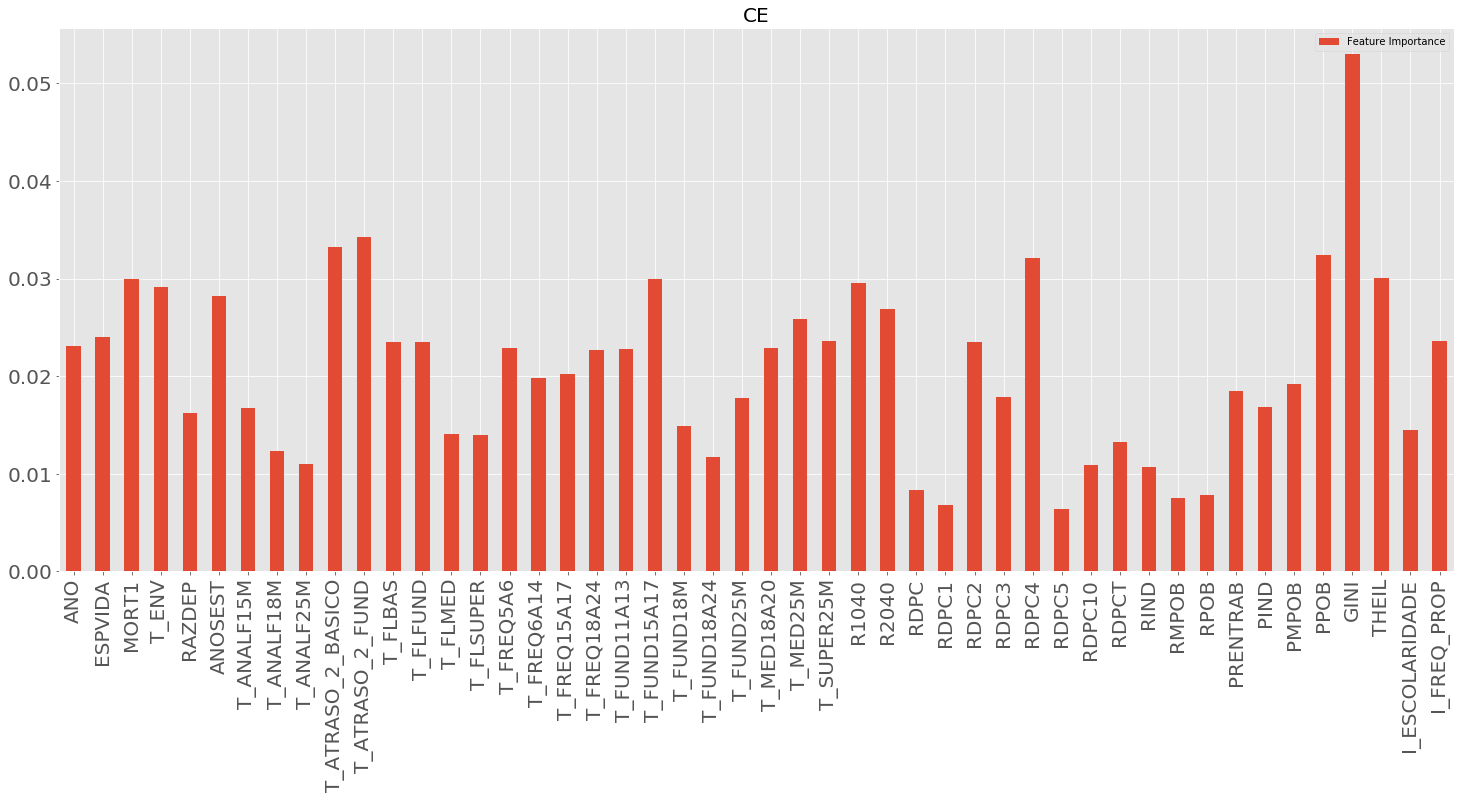

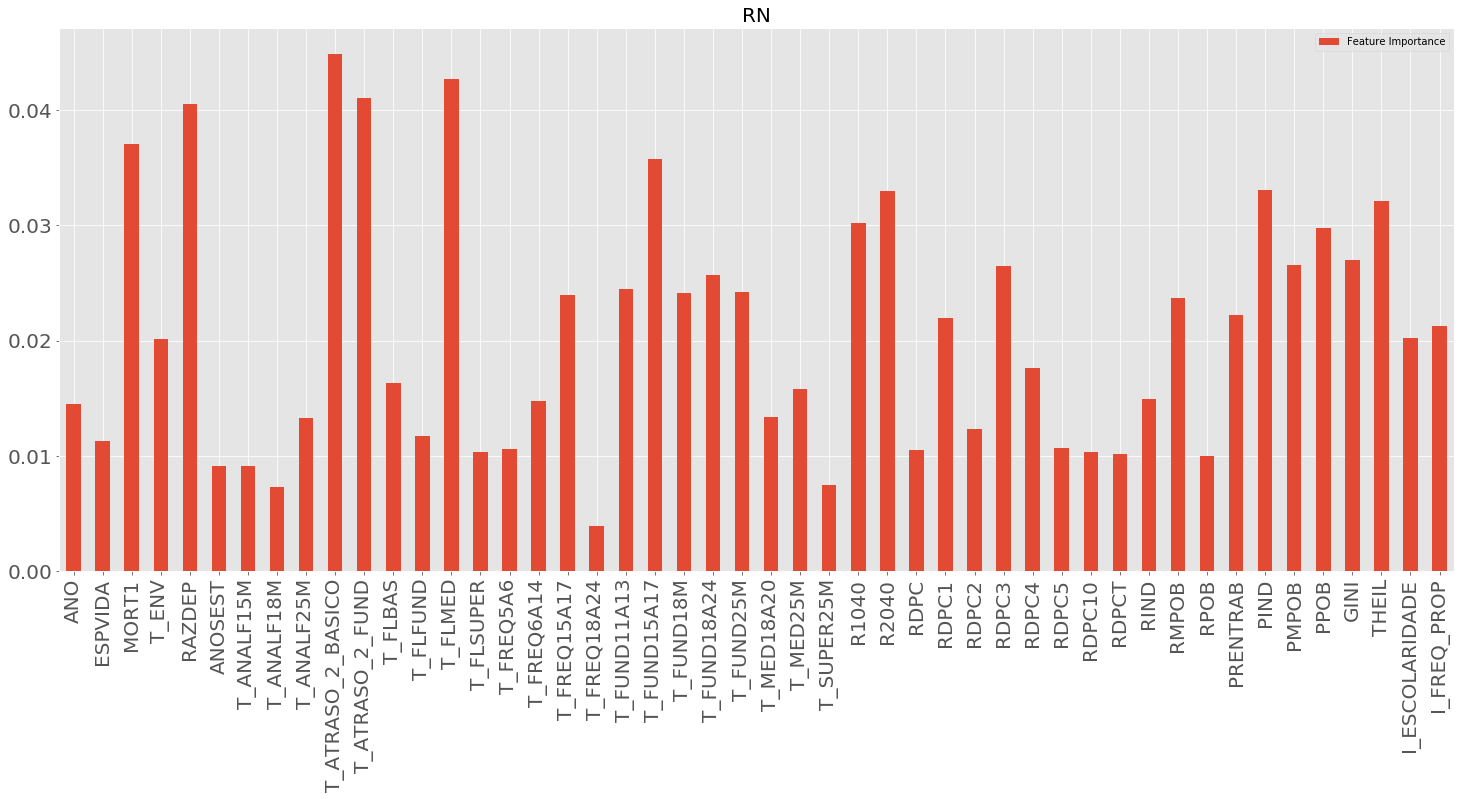

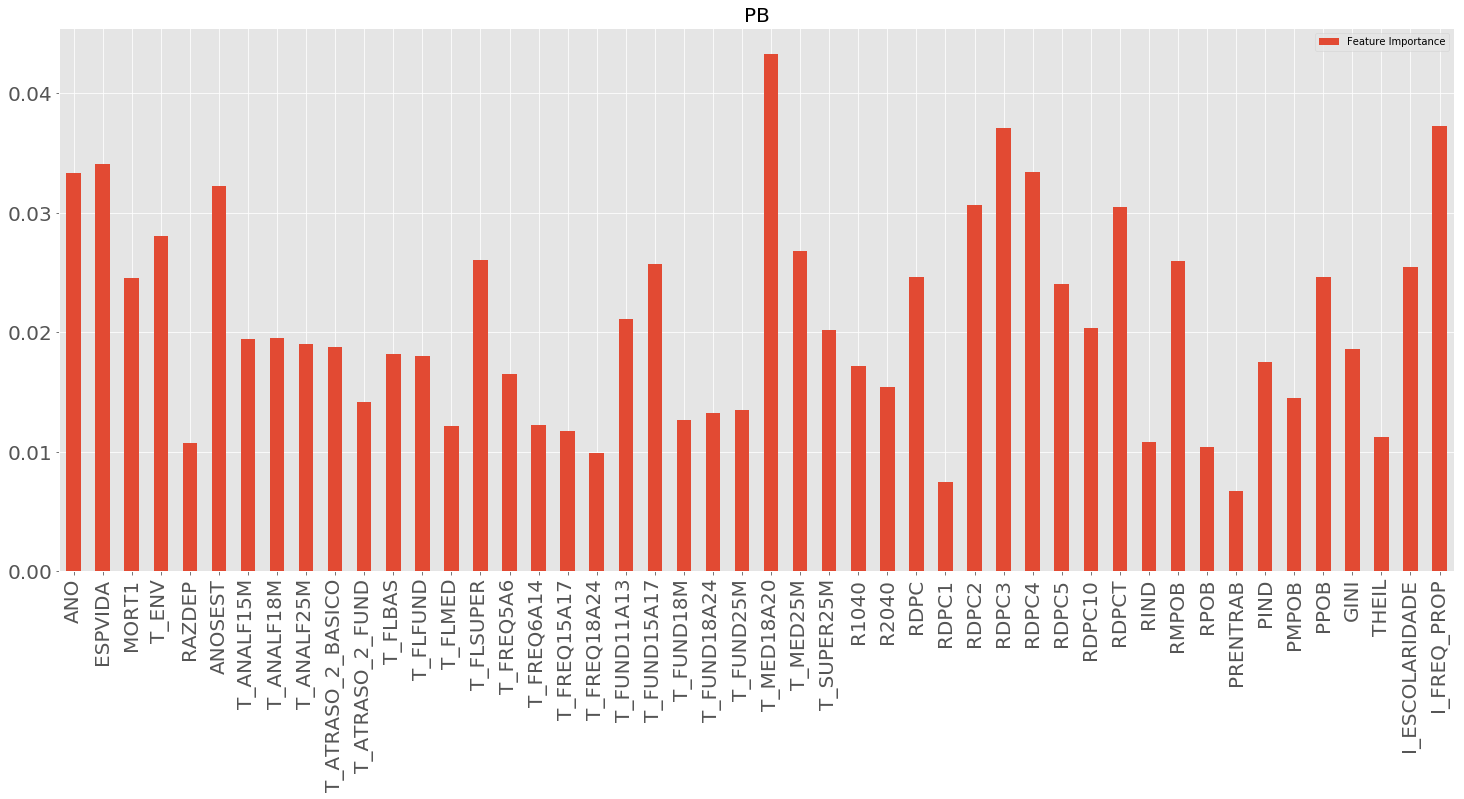

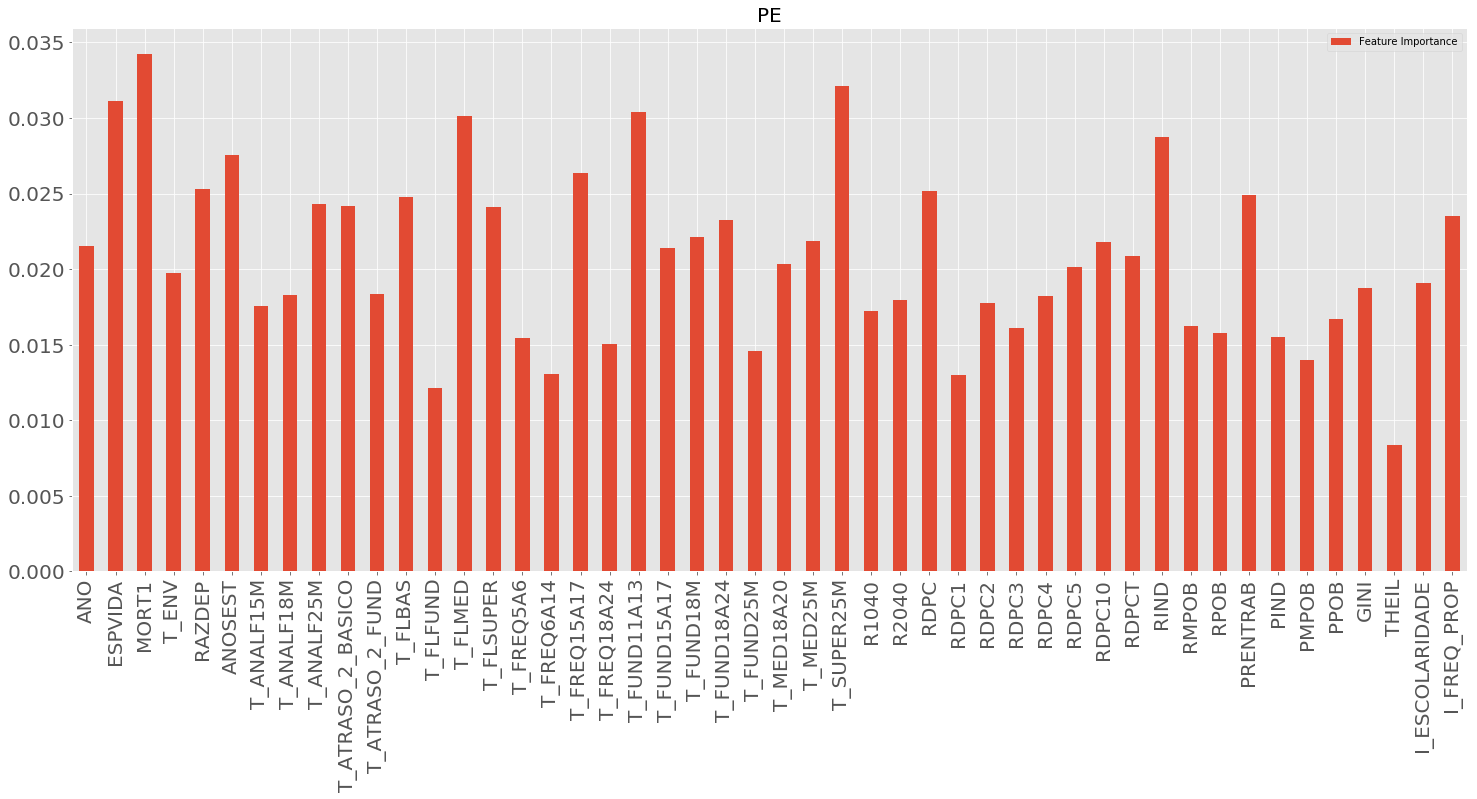

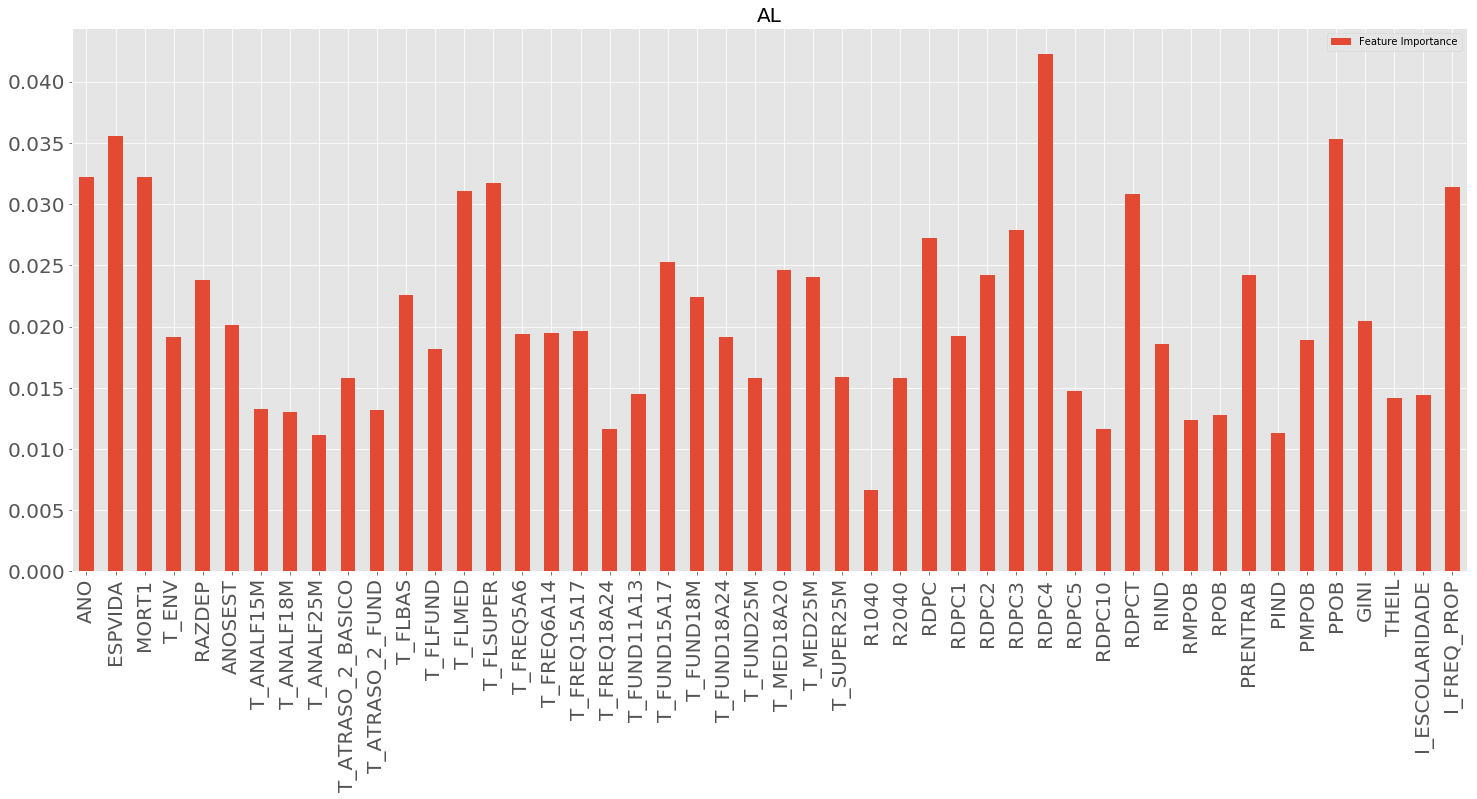

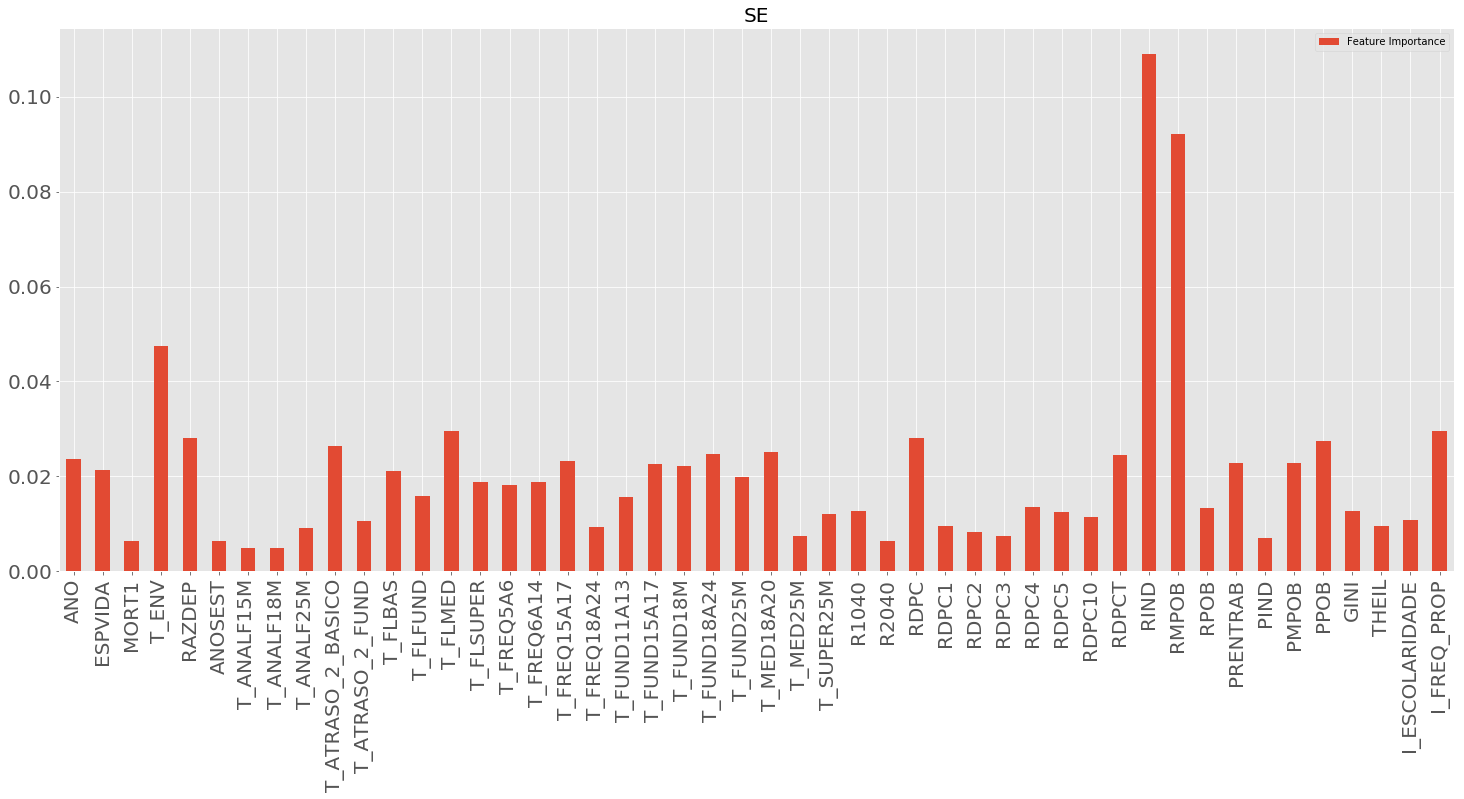

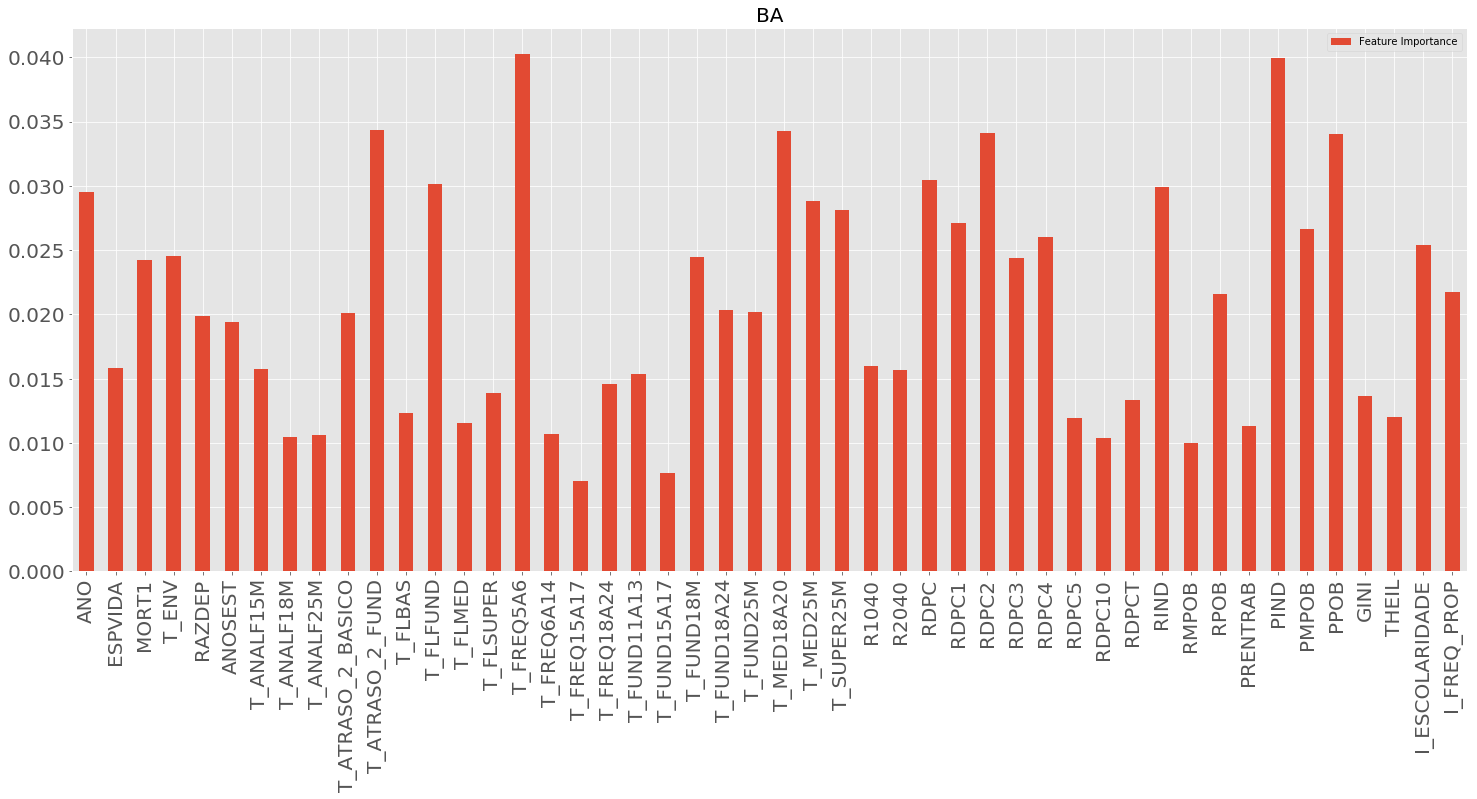

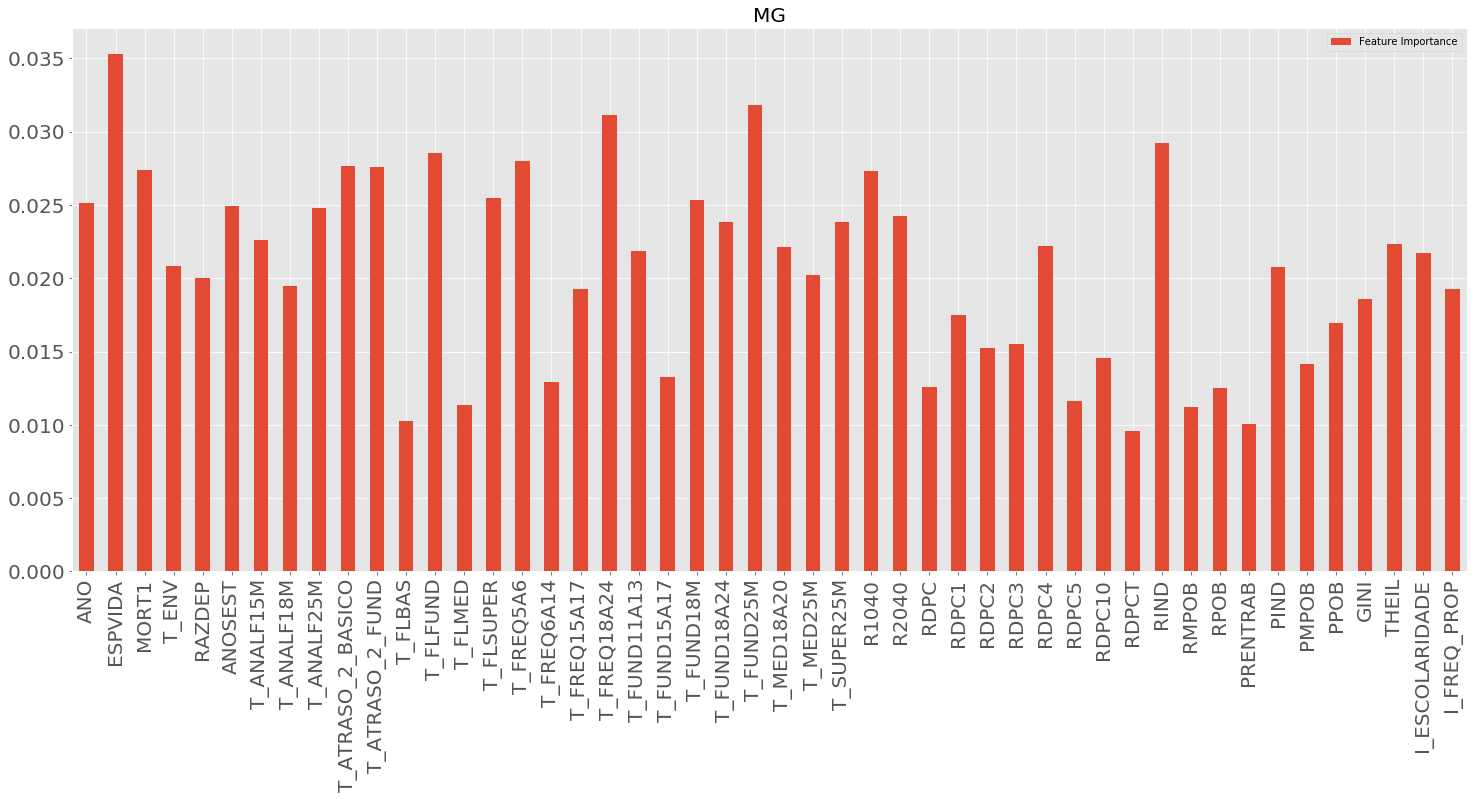

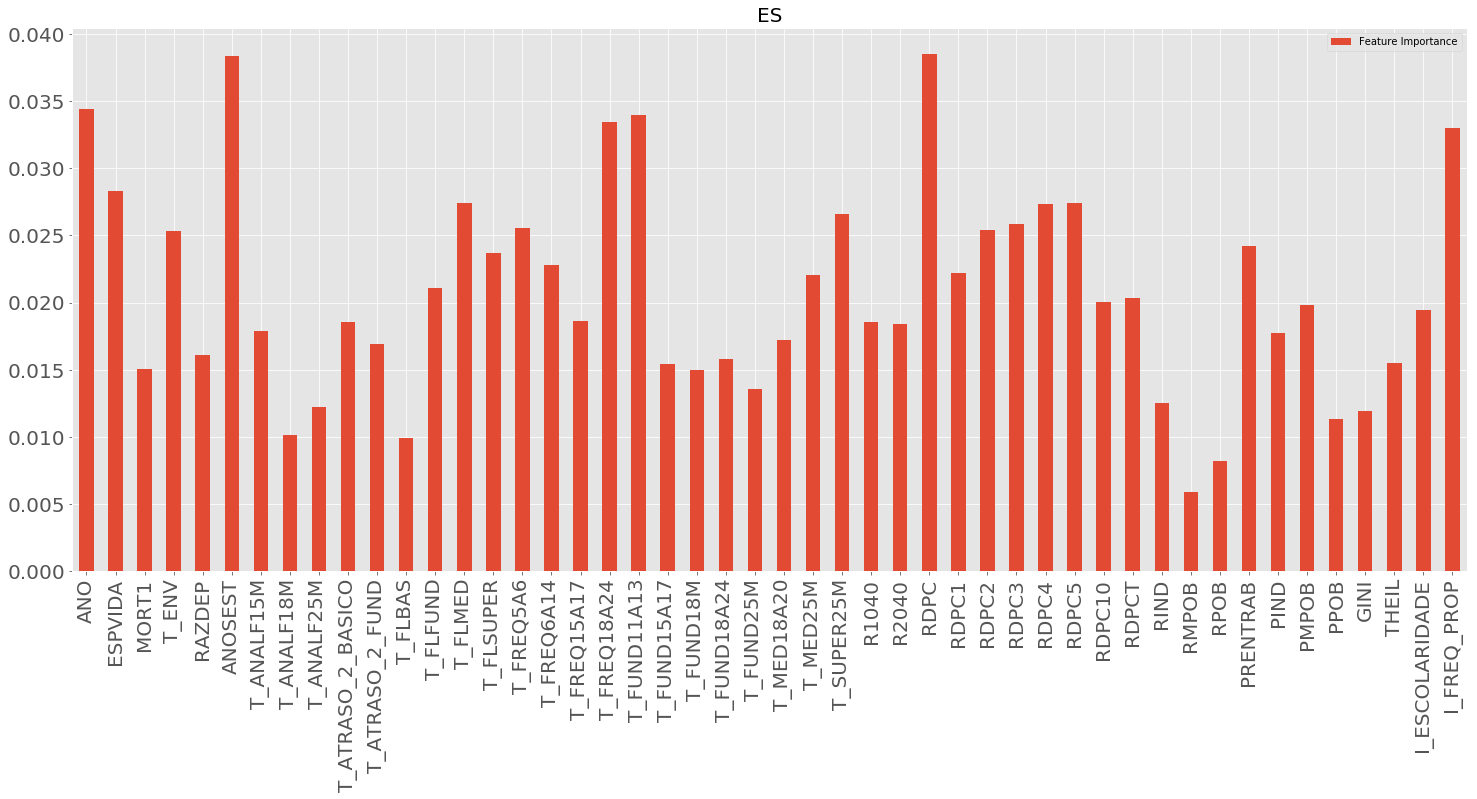

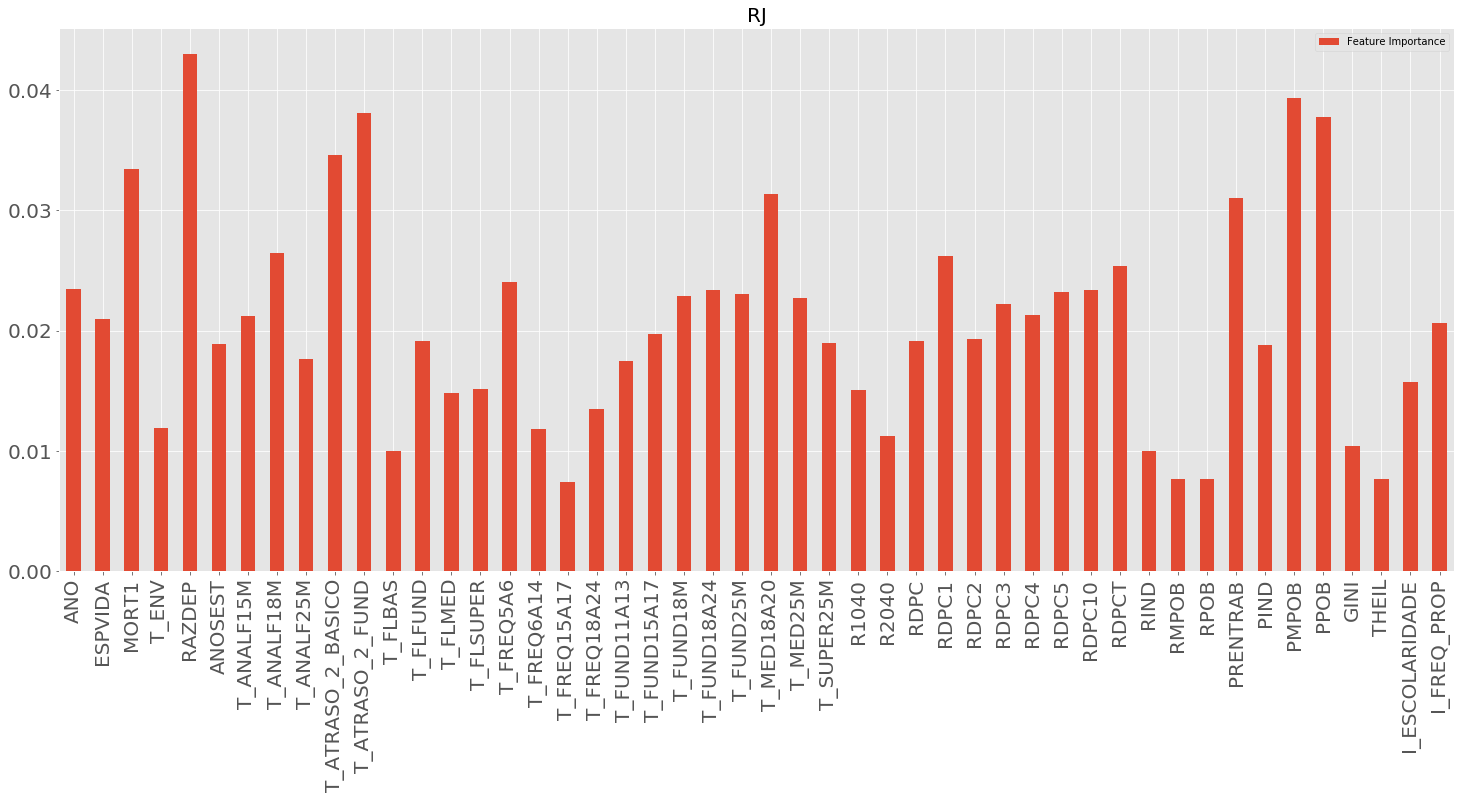

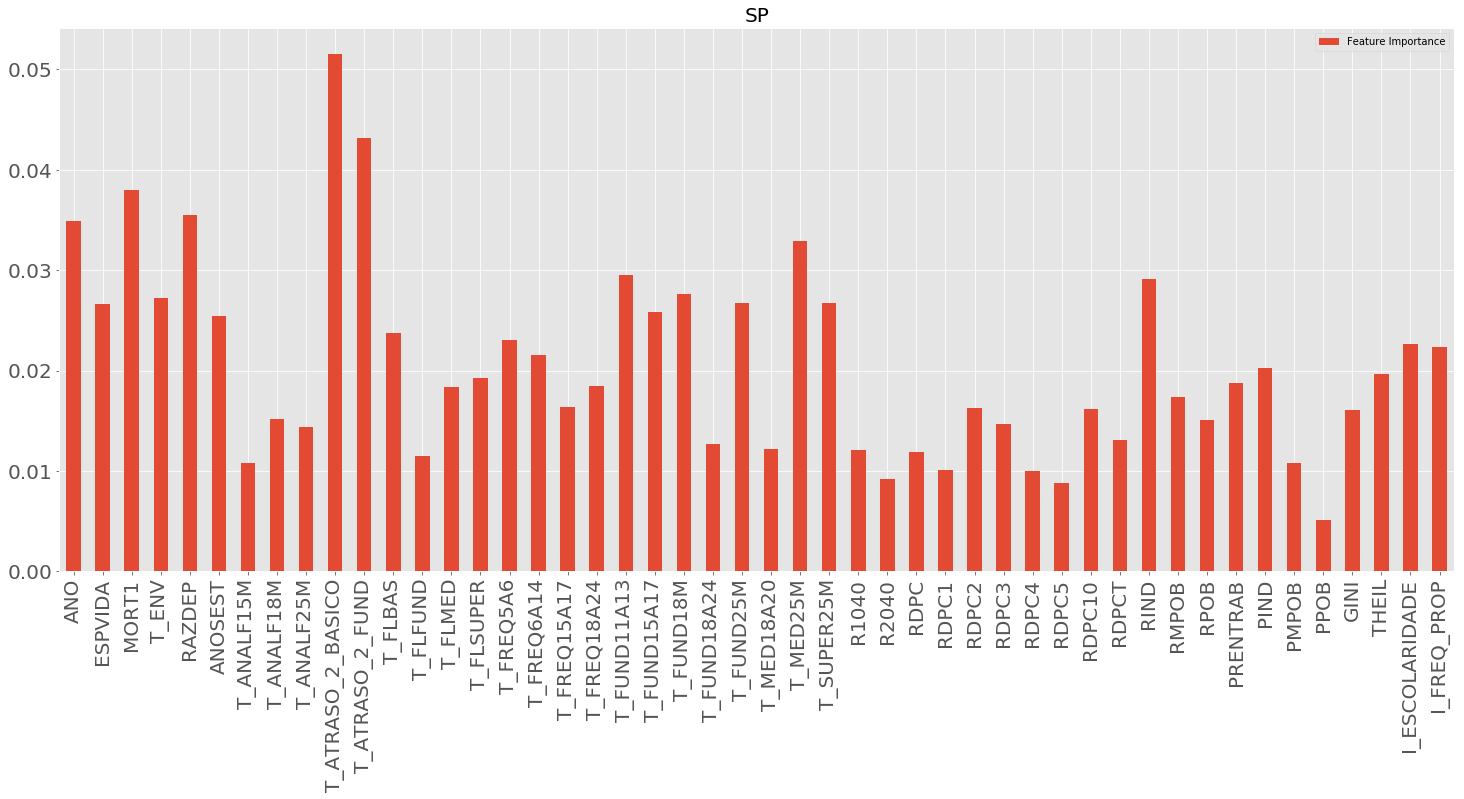

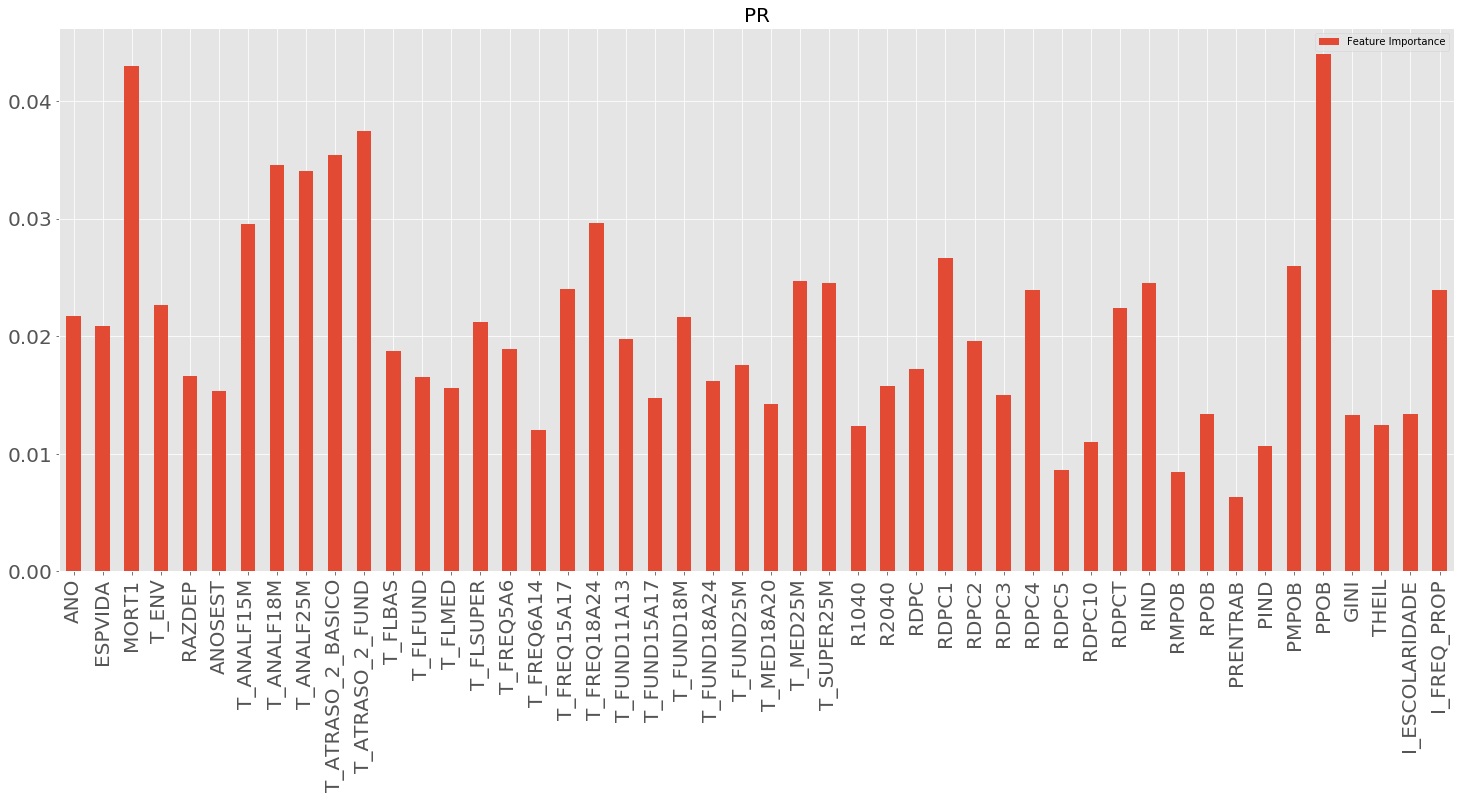

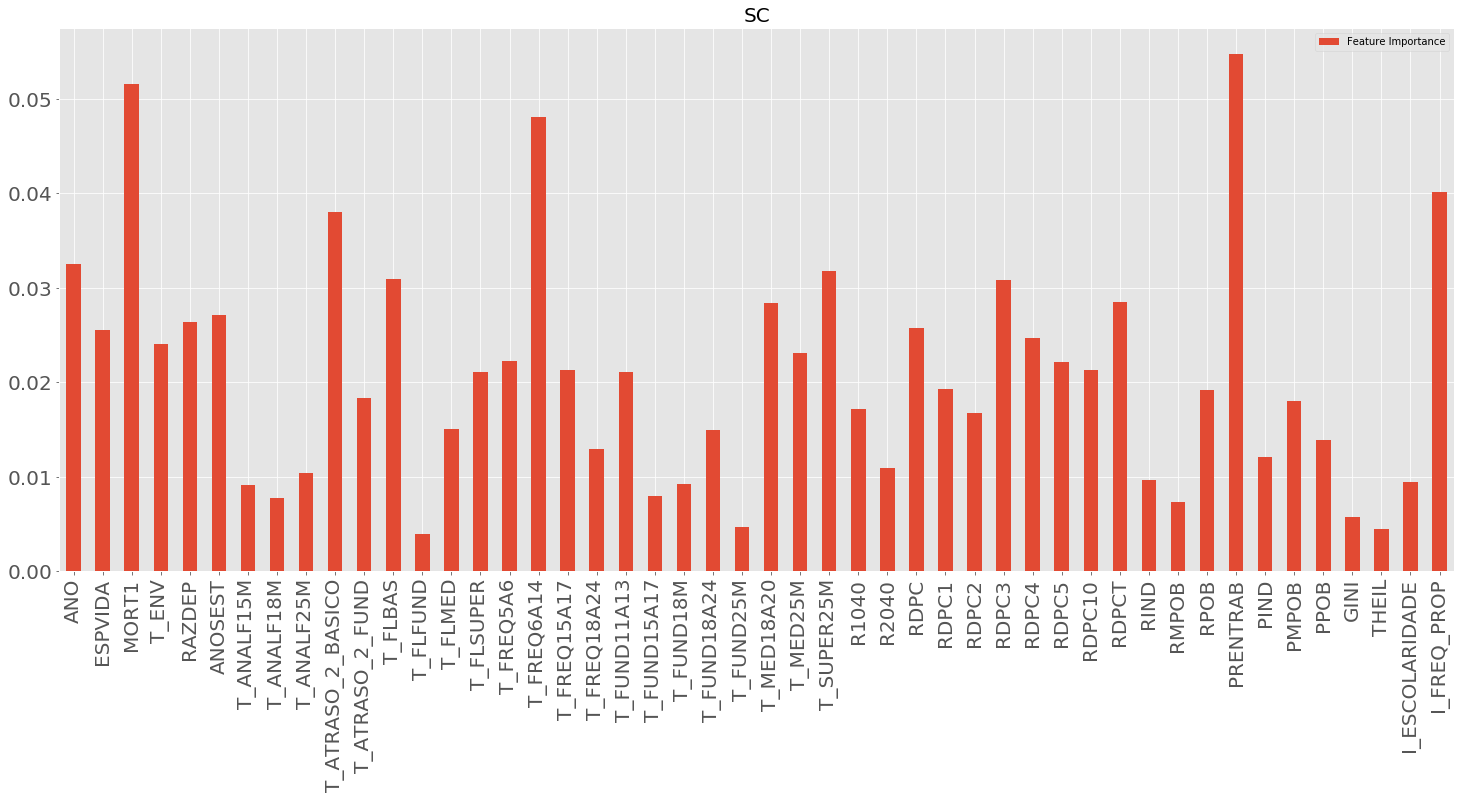

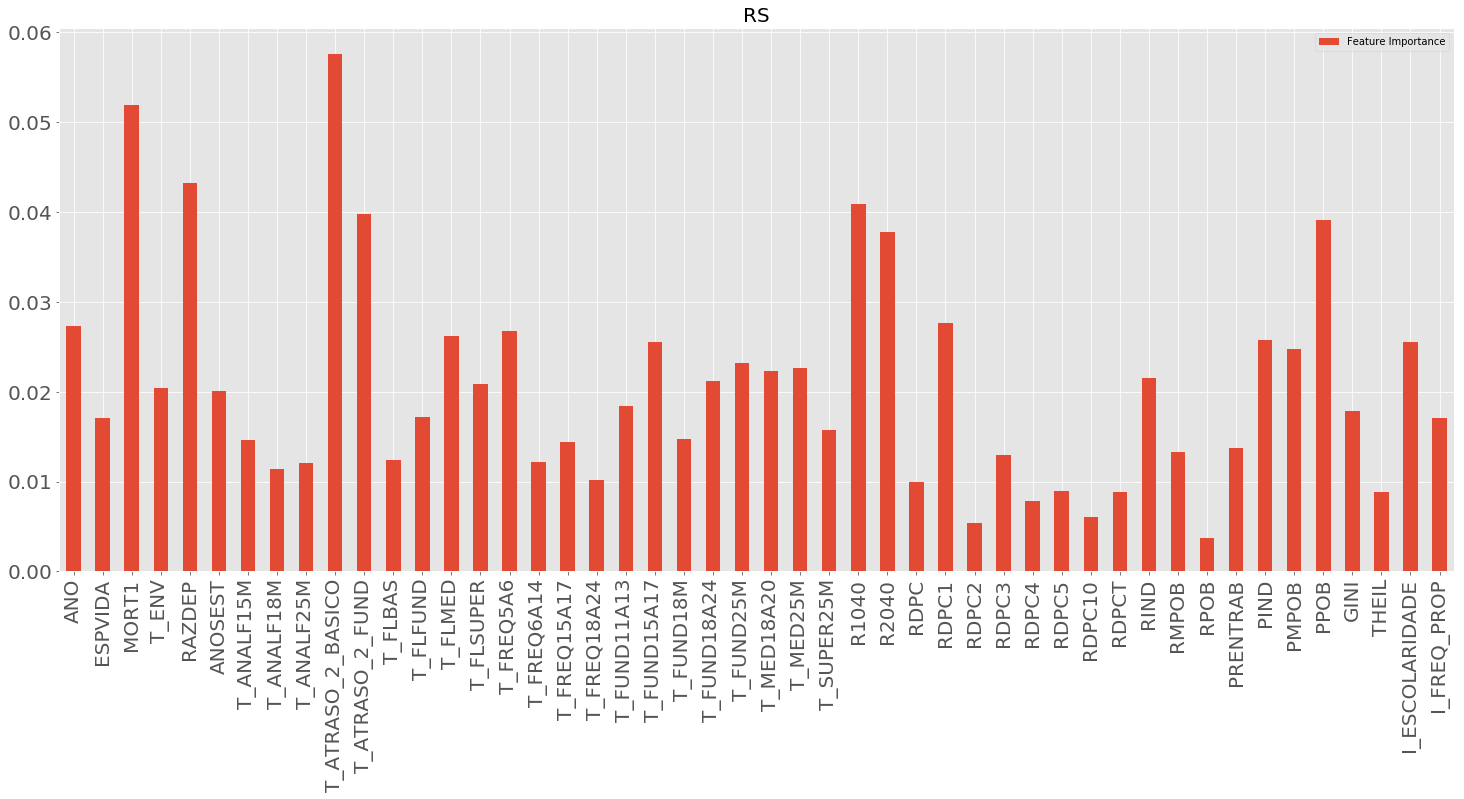

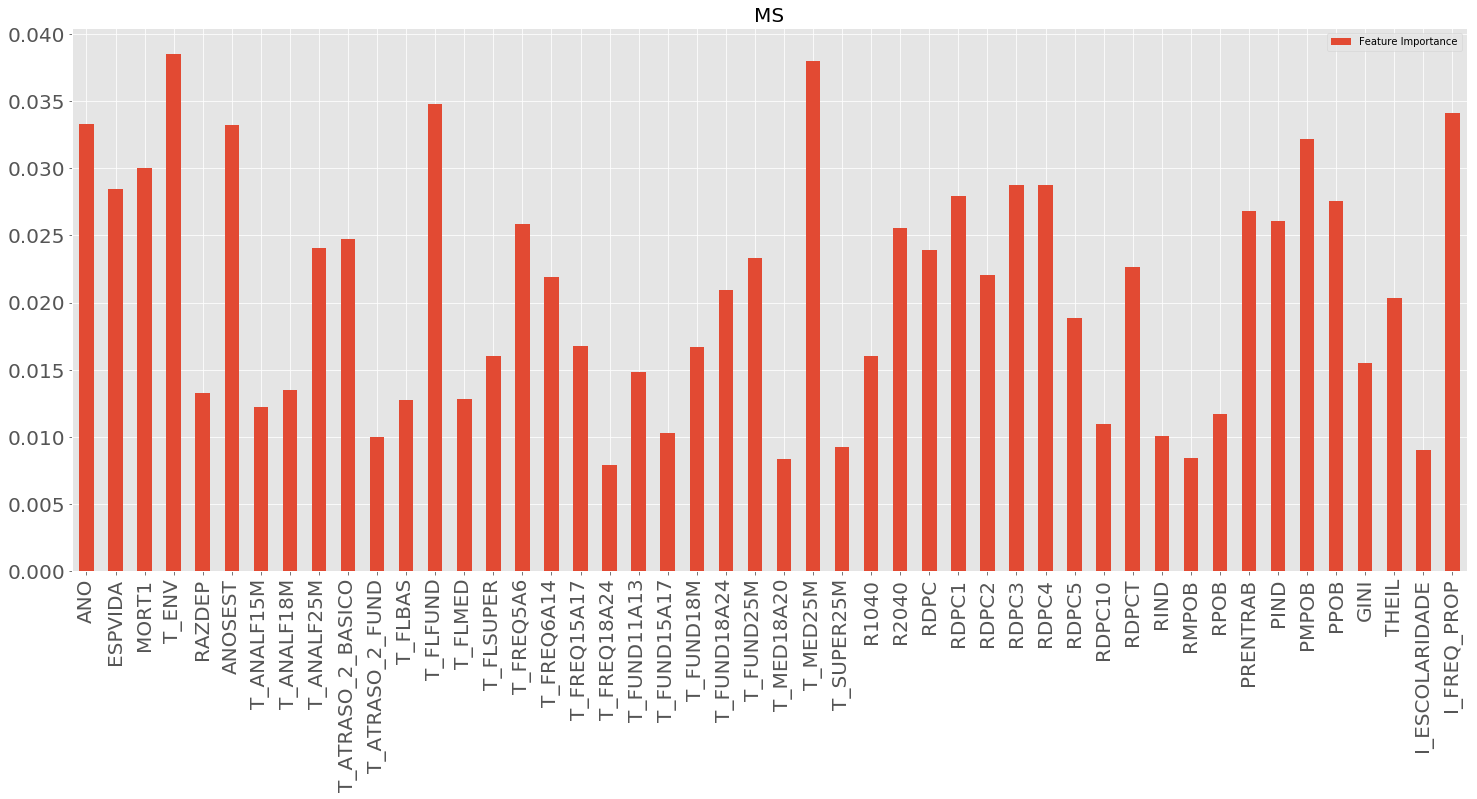

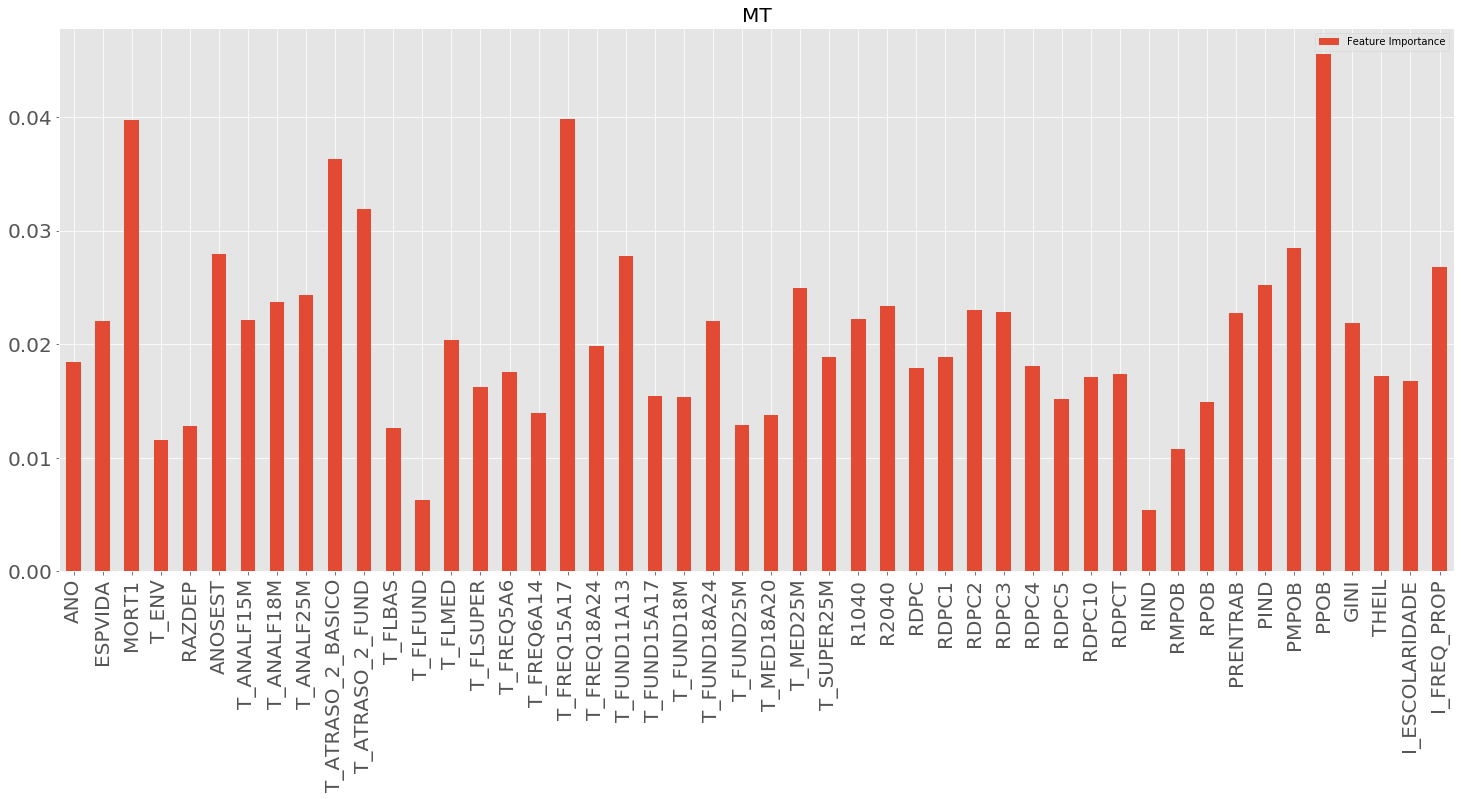

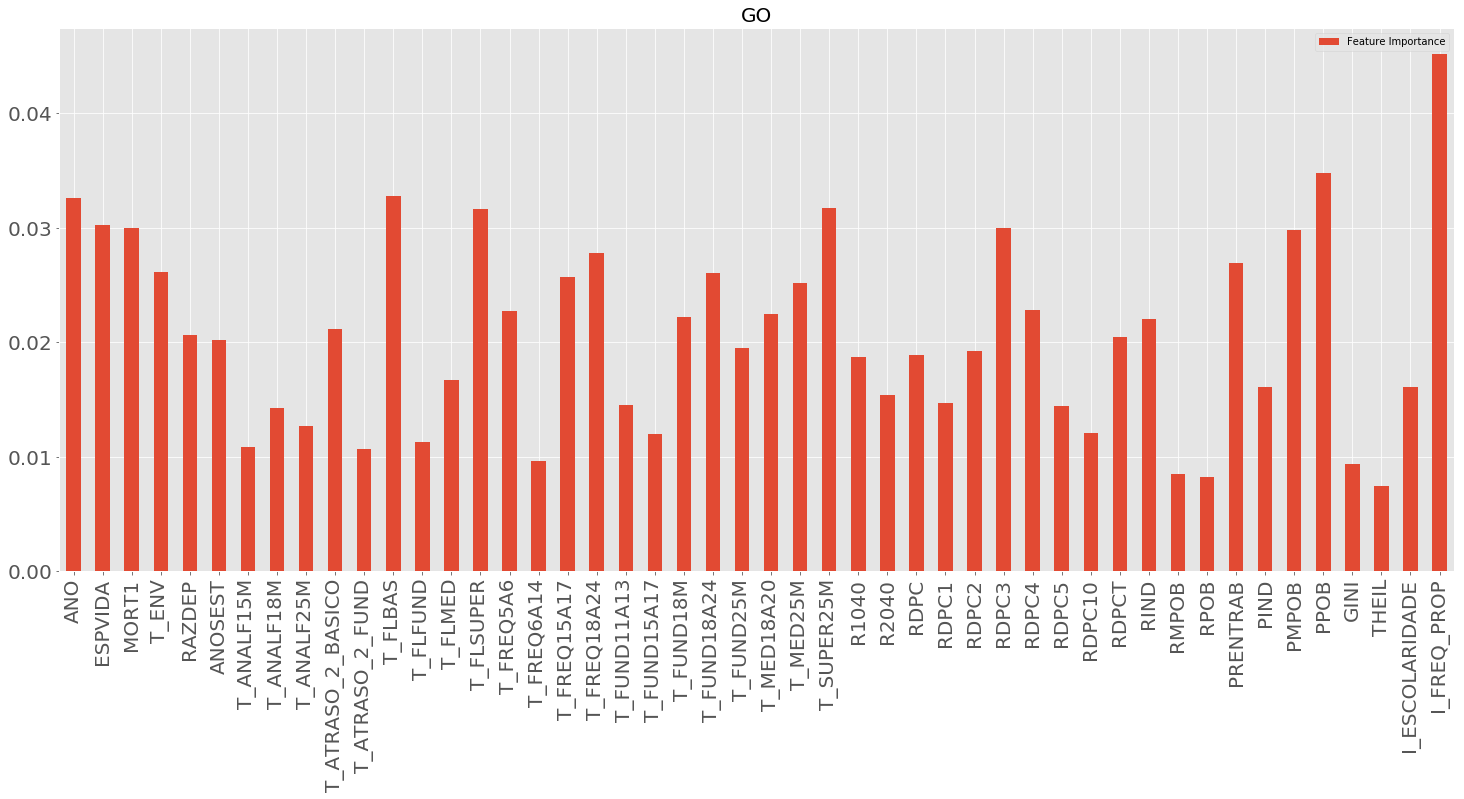

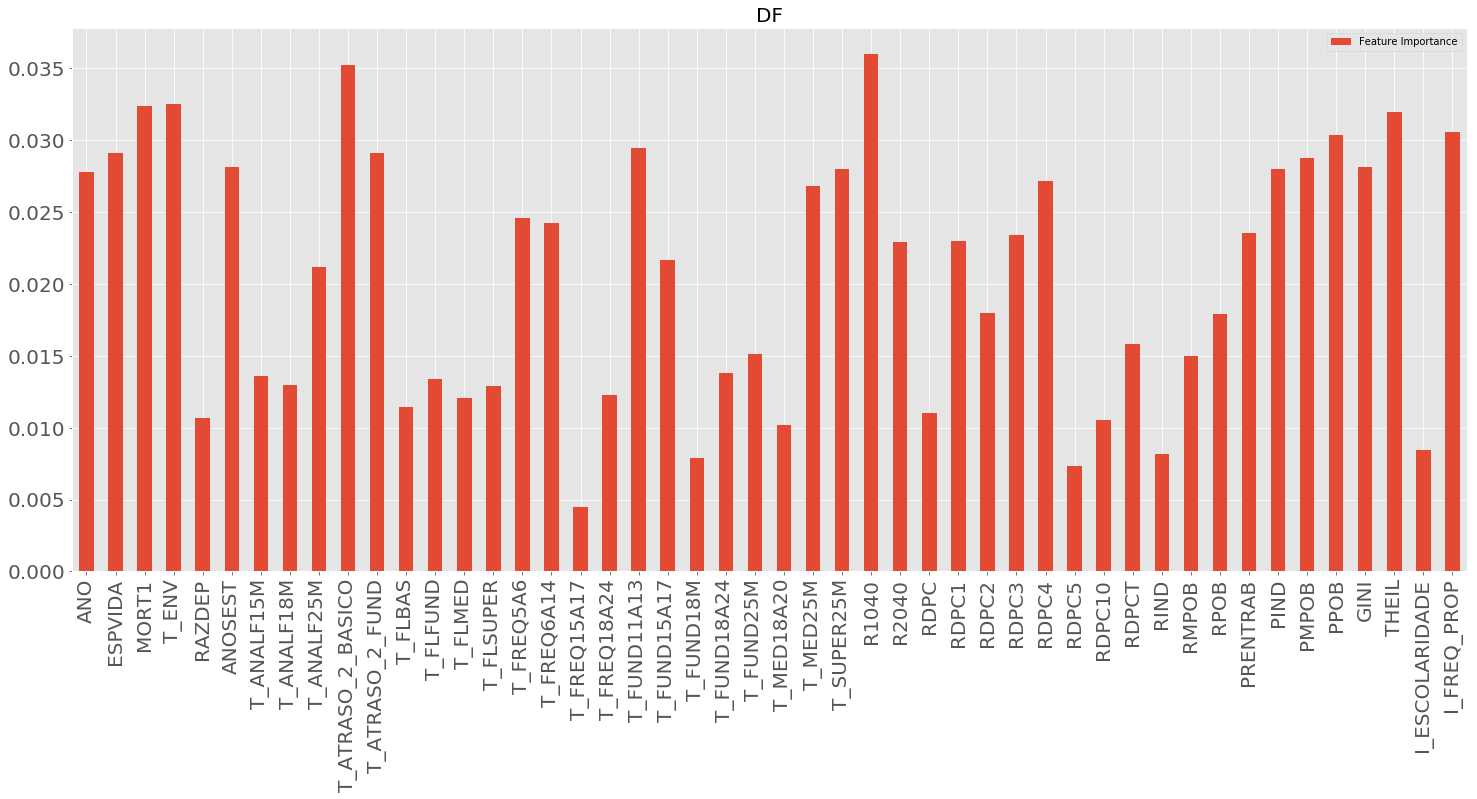

In [130]:
# Visualização da importância das features em cada UF no período de 2011 a 2015.
for uf, df in fi_dfs.items():
    _ = df.plot(kind='bar', figsize=(25, 10))
    _ = plt.title(uf, fontsize=20)
    _ = plt.xticks(fontsize=20)
    _ = plt.yticks(fontsize=20)

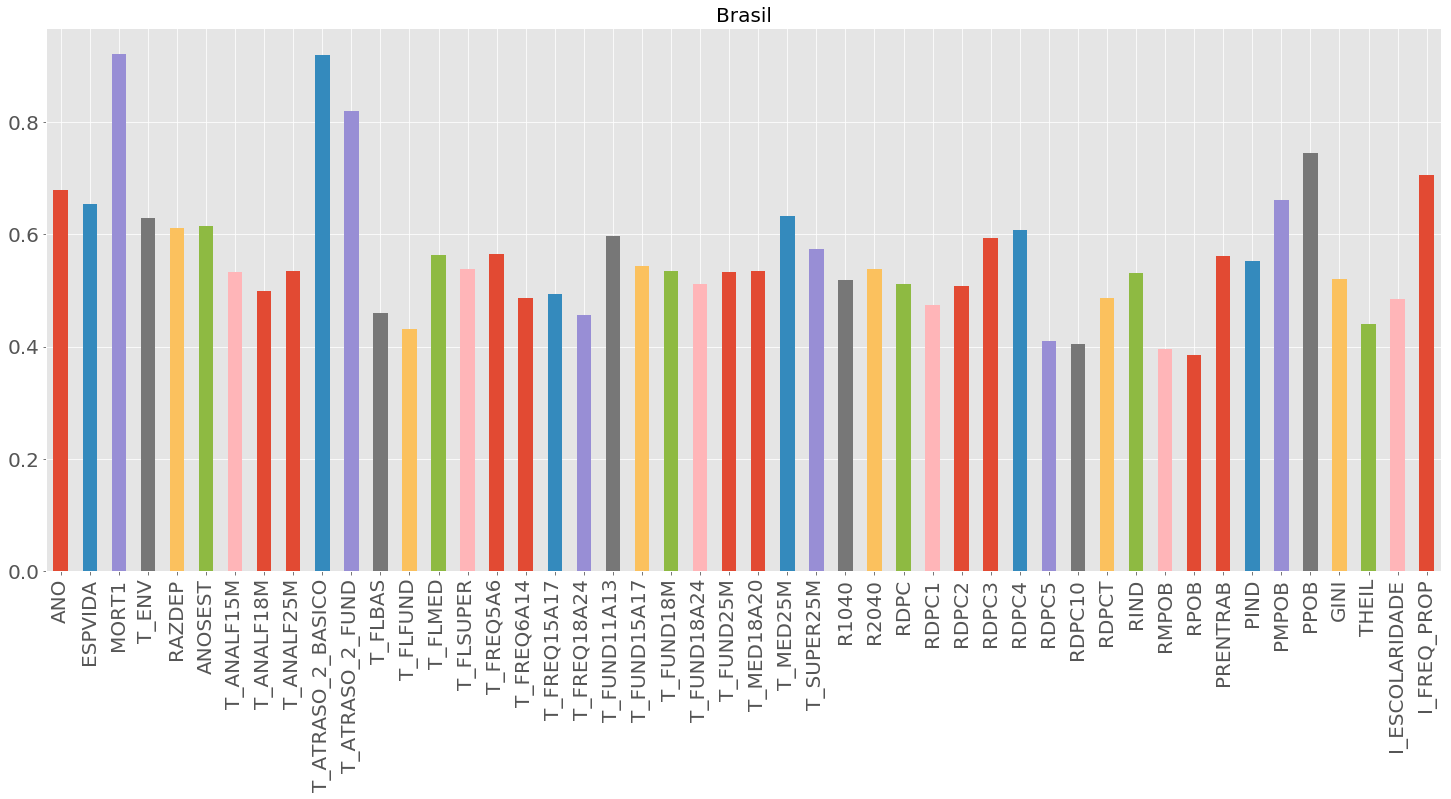

In [131]:
# Média das importâncias das features de todas as UFs.
total_fi = pd.concat(fi_dfs.values(), axis=1).sum(axis=1)
_ = total_fi.plot(kind='bar', figsize=(25, 10))
_ = plt.title('Brasil', fontsize=20)
_ = plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)

In [198]:
# As 10 features mais relevantes em cada estado.
top_fi = {}

for uf, df in fi_dfs.items():
    top_fi[uf] = list(df.sort_values('Feature Importance', ascending=False).head(10).index)
    
top10_fi = pd.DataFrame(top_fi)

top10_fi.T

,0,1,2,3,4,5,6,7,8,9
RO,T_ANALF15M,R2040,PMPOB,T_ANALF25M,T_ATRASO_2_BASICO,PIND,PPOB,T_ANALF18M,R1040,MORT1
AC,MORT1,T_ATRASO_2_FUND,T_ATRASO_2_BASICO,T_FREQ15A17,T_FLMED,T_FUND18A24,T_ANALF18M,ANO,T_FUND15A17,T_MED25M
AM,RAZDEP,T_ATRASO_2_BASICO,T_MED25M,PMPOB,T_ATRASO_2_FUND,T_ANALF25M,T_FLMED,T_FREQ6A14,T_ANALF18M,T_FUND25M
RR,T_ATRASO_2_FUND,T_ATRASO_2_BASICO,MORT1,PRENTRAB,T_SUPER25M,RDPC4,T_FUND11A13,T_ANALF15M,R2040,T_ANALF18M
PA,T_ANALF15M,PMPOB,MORT1,T_ANALF25M,THEIL,RAZDEP,T_MED25M,T_ANALF18M,T_FUND11A13,T_ENV
AP,T_ATRASO_2_BASICO,PPOB,R2040,GINI,T_ANALF25M,T_ANALF15M,R1040,T_ANALF18M,T_ATRASO_2_FUND,THEIL
TO,T_FUND18M,T_FREQ6A14,MORT1,T_FLSUPER,T_ENV,T_FUND25M,RDPC3,T_MED25M,I_FREQ_PROP,T_FLMED
MA,T_FLSUPER,T_ANALF18M,T_ANALF25M,T_ENV,PRENTRAB,I_FREQ_PROP,ESPVIDA,T_SUPER25M,T_ANALF15M,T_FUND18A24
PI,T_ATRASO_2_FUND,T_ATRASO_2_BASICO,MORT1,PPOB,T_FREQ18A24,RAZDEP,RDPC10,PMPOB,PIND,RDPC4
CE,GINI,T_ATRASO_2_FUND,T_ATRASO_2_BASICO,PPOB,RDPC4,THEIL,T_FUND15A17,MORT1,R1040,T_ENV


### Análise da UF Rondônia

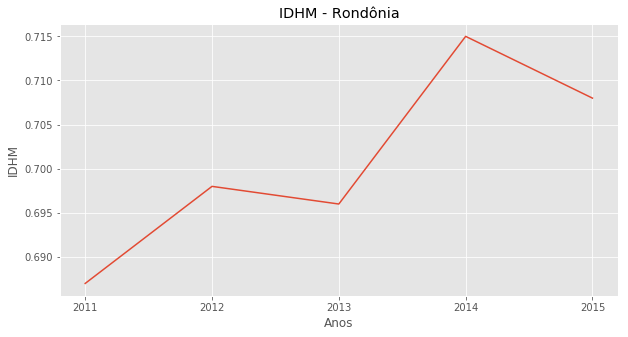

In [197]:
ro_idh = idh[idh['NOME_AGREGA']=='RO'].copy()

fig, ax = plt.subplots(figsize=(10, 5))
_ = sns.lineplot(y='IDHM', x='ANO', data=ro_idh, ax=ax)
_ = ax.set(xticks=[2011, 2012, 2013, 2014, 2015], xlabel='Anos', title='IDHM - Rondônia')

,T_ANALF15M
ANO,
2011,9.74
2012,8.57
2013,8.56
2014,8.34
2015,8.01


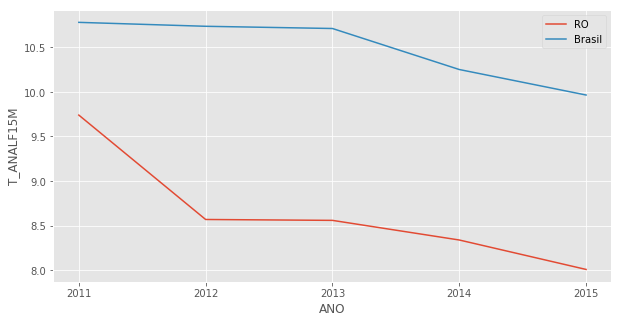

In [196]:
ro_idh.pivot_table(index='ANO', values='T_ANALF15M')
geral = idh.pivot_table(index='ANO', values='T_ANALF15M')

fig, ax = plt.subplots(figsize=(10, 5))
_ = sns.lineplot(x='ANO', y='T_ANALF15M', data=ro_idh, ax=ax, label='RO')
_ = sns.lineplot(x=geral.index, y=geral['T_ANALF15M'], ax=ax, label='Brasil')
_ = ax.set(xticks=[2011, 2012, 2013, 2014, 2015])

De 2011 para 2015 a taxa de analfabetismo da população maior de 15 anos ou mais de idade da UF Rondônia diminuiu em 1.73 pontos percentuais, mais do que a média 0.82 pontos percentuais de todas as UFs neste mesmo período. Isto pode ter afetado o IDHM positivamente.

In [203]:
top10_fi['RO'].values

array(['T_ANALF15M', 'R2040', 'PMPOB', 'T_ANALF25M', 'T_ATRASO_2_BASICO',
       'PIND', 'PPOB', 'T_ANALF18M', 'R1040', 'MORT1'], dtype=object)

      T_ANALF15M
ANO             
2011        9.74
2012        8.57
2013        8.56
2014        8.34
2015        8.01


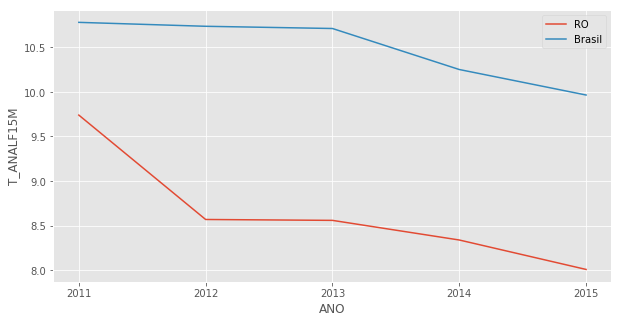

      R2040
ANO        
2011   8.99
2012   8.49
2013   8.10
2014   7.86
2015   8.07


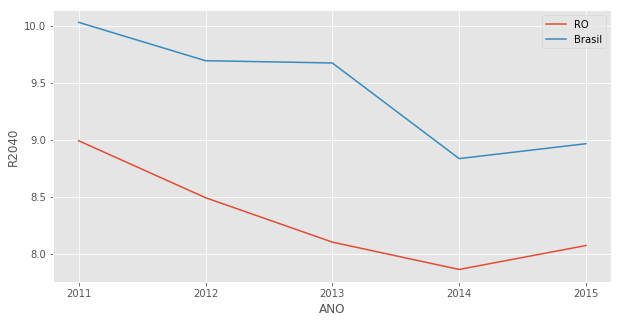

      PMPOB
ANO        
2011  12.75
2012  11.28
2013  10.07
2014   7.19
2015   9.53


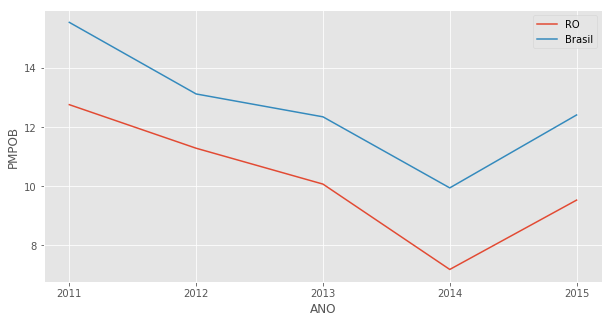

      T_ANALF25M
ANO             
2011       12.68
2012       11.35
2013       11.09
2014       10.66
2015       10.06


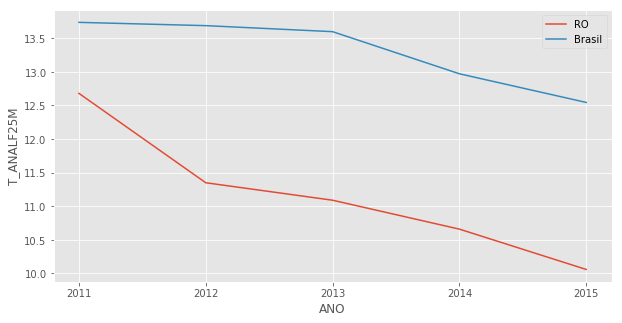

      T_ATRASO_2_BASICO
ANO                    
2011              23.15
2012              22.21
2013              20.43
2014              15.55
2015              17.07


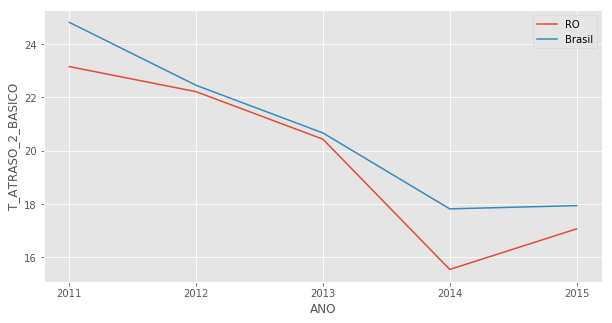

      PIND
ANO       
2011  3.96
2012  3.07
2013  3.76
2014  3.01
2015  1.68


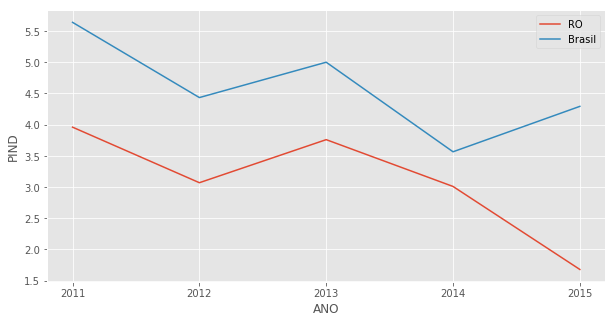

       PPOB
ANO        
2011  30.47
2012  27.37
2013  27.27
2014  22.73
2015  26.70


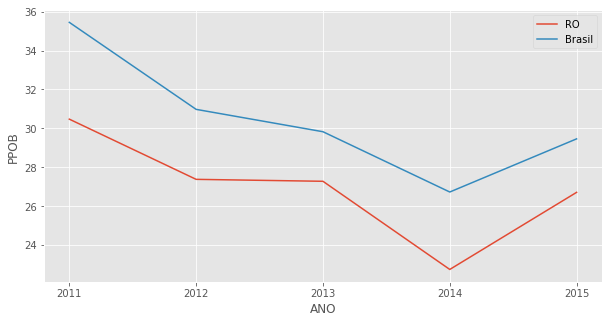

      T_ANALF18M
ANO             
2011       10.66
2012        9.26
2013        9.24
2014        8.88
2015        8.65


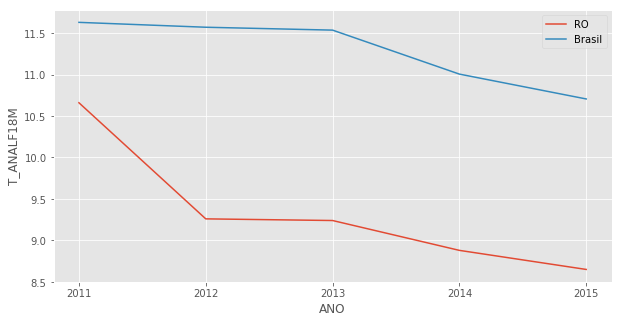

      R1040
ANO        
2011  12.64
2012  11.86
2013  11.17
2014  10.90
2015  11.15


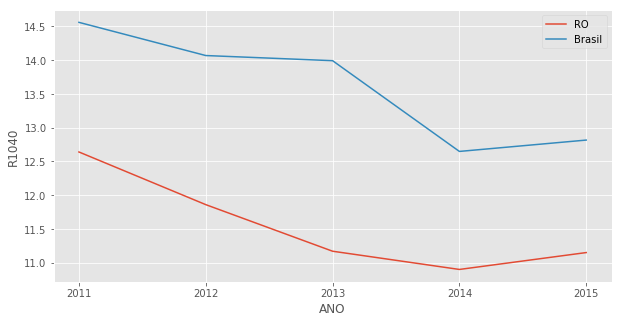

      MORT1
ANO        
2011  22.24
2012  21.75
2013  21.27
2014  20.82
2015  20.38


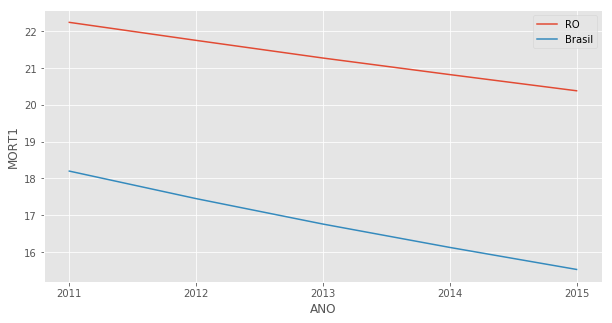

In [205]:
for col in top10_fi['RO'].values:
    print(ro_idh.pivot_table(index='ANO', values=col))
    geral = idh.pivot_table(index='ANO', values=col)

    fig, ax = plt.subplots(figsize=(10, 5))
    _ = sns.lineplot(x='ANO', y=col, data=ro_idh, ax=ax, label='RO')
    _ = sns.lineplot(x=geral.index, y=geral[col], ax=ax, label='Brasil')
    _ = ax.set(xticks=[2011, 2012, 2013, 2014, 2015])
    plt.show()

In [ ]:
educacao_cols = ['ANOSEST', 'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M',
                 'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
                 'T_FLMED', 'T_FLSUPER', 'T_FREQ5A6', 'T_FREQ6A14', 'T_FREQ15A17',
                 'T_FREQ18A24', 'T_FUND11A13', 'T_FUND15A17', 'T_FUND18M', 'T_FUND18A24',
                 'T_FUND25M', 'T_MED18A20', 'T_MED25M', 'T_SUPER25M', 'I_ESCOLARIDADE',
                 'I_FREQ_PROP', 'IDHM_E', 'IDHM']

renda_cols = ['RAZDEP', 'R1040', 'R2040', 'RDPC', 'RDPC1', 'RDPC2',
              'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'RDPCT', 'RIND',
              'RMPOB', 'RPOB', 'PRENTRAB', 'PIND', 'PMPOB', 'PPOB',
              'GINI', 'THEIL', 'IDHM_R', 'IDHM']

longevidade_cols = ['ESPVIDA', 'MORT1', 'T_ENV', 'IDHM_L', 'IDHM']

sociedade_cols = ['POP', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
                  'POP15M', 'POP18M', 'POP18A20', 'POP18A24', 'POP25M', 'POP65M',
                  'POPT', 'POPTOT', 'IDHM_E', 'IDHM_L', 'IDHM_R', 'IDHM']